# 1. IMPORTING LIBRARY

Dalam proyek ini, digunakan beberapa library utama: **Pandas** untuk pengolahan data, **NumPy** untuk operasi numerik, **Matplotlib** dan **Seaborn** untuk visualisasi, serta **Zipfile** dan **OS** untuk mengelola file dan direktori.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

Mengunduh dataset student-performance-factors dari kaggle menggunakan Kaggle API.

In [2]:
!kaggle datasets download -d lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 14.7MB/s]


Selanjutnya, mengekstrak file ZIP yang diunduh ke folder bernama student-performance-factors.

In [3]:
!unzip student-performance-factors -d student-performance-factors

Archive:  student-performance-factors.zip
  inflating: student-performance-factors/StudentPerformanceFactors.csv  


# 2. DATA LOADING

In [4]:
df = pd.read_csv("student-performance-factors/StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


Dari data diatas terlihat 20 Variabel dengan jumlah sebanyak 6607

# 3. DATA UNDERSTANDING


A. Melihat jumlah masing-masing variabel beserta tipenya

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

Dari hasil di atas, dapat dilihat bahwa:

Kolom bertipe object:

Kolom yang berisi data kategori atau teks:

Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender.

Kolom bertipe int64:

Kolom yang berisi data numerik tanpa desimal:

Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score.

B. Deskripsi Variabel

Berikut merupakan arti dari masing masing variabel beserta nilai-nilainya.

Variabel | Keterangan | Nilai
------- | ----------- | --------
Hourss_Studied | Jumlah Jam yang dihabiskan siswa untuk belajar | 1-44
Attendance | Tingkat kehadiran siswa | 60-100
Parental_Involvement | Tingkat keterlibatan orang tua dalam pendidikan siswa | Low, Medium, High
Access_to_Resources | Ketersediaan sumber daya pendidikan untuk siswa | Low, Medium, High
Extracurricular_Activities | Partisipasi siswa dalam kegiatan ekstrakurikuler | Yes, No
Sleep_Hours | Jumlah jam tidur siswa setiap malam | 4-10
Previous_Scores | Skor siswa pada tes sebelumnya | 50-100
Motivation_Level | Tingkat motivasi siswa untuk belajar | Low, Medium, High
Internet_Access | Ketersediaan akses internet untuk siswa | Yes, No
Tutoring_Sessions | Jumlah sesi les tambahan yang diikuti siswa | 0-8
Family_Income | Tingkat pendapatan keluarga siswa | Low, Medium, High
Teacher_Quality | Kualitas pengajaran guru | Low, Medium, High
School_Type | Jenis sekolah tempat siswa belajar | Public, Private
Peer_Influence | Pengaruh teman sebaya terhadap siswa |  Negative, Neutral, Positive
Physical_Activity | Frekuensi aktivitas fisik siswa dalam seminggu | 0-6
Learning_Disabilities | Indikasi apakah siswa memiliki kesulitan belajar | No, Yes
Parental_Education_Level |Tingkat pendidikan tertinggi yang dicapai oleh orang tua | High School, College, Postgraduate.
Distance_from_Home | Jarak antara rumah siswa dan sekolah | Near, Moderate, Far
Gender | Jenis kelamin siswa | Male, Female
Exam_Score | Nilai  ujian siswa | 55-101

C. Deskripsi Statistik Data

In [6]:
 df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# 4. DATA CLEANING

A. Menangani Missing Value

Langkah pertama dalam Data Cleaning adalah memeriksa nilai 0 pada setiap kolom

In [7]:
missing_values = df.isnull().sum()
print("Jumlah nilai yang hilang di setiap kolom:\n", missing_values)

Jumlah nilai yang hilang di setiap kolom:
 Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


Terlihat bahwa ada beberapa kolom yang bernilai 0. oleh karena itu, pada baris yang terdapat nilai 0 akan dihapus.

In [8]:
missing_rows = df.loc[(df[["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"]].isnull().any(axis=1))]
df = df.loc[(df[["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"]].notnull().all(axis=1))]
df.shape

(6378, 20)

Setelah menghapus pada baris yang terdapat nilai 0, sehingga terdapat 6378 baris

B. Memeriksa Outlier

langkah kedua dalam Data Cleaning adalah Memeriksa Outlier pada kolom-kolom Numerik

<Axes: xlabel='Hours_Studied'>

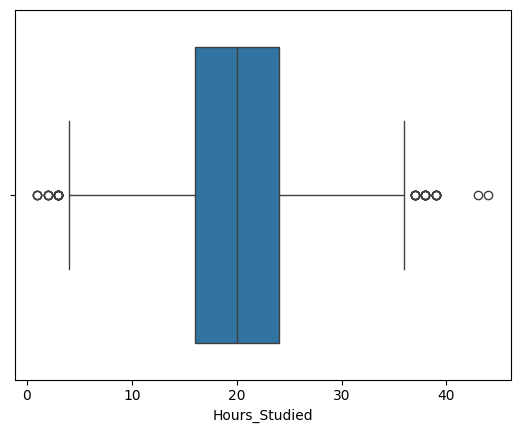

In [9]:
sns.boxplot(x = df["Hours_Studied"])

Terdapat beberapa nilai outlier pada kolom Hours_Studied, yaitu nilai yang jauh di luar rentang distribusi utama

<Axes: xlabel='Attendance'>

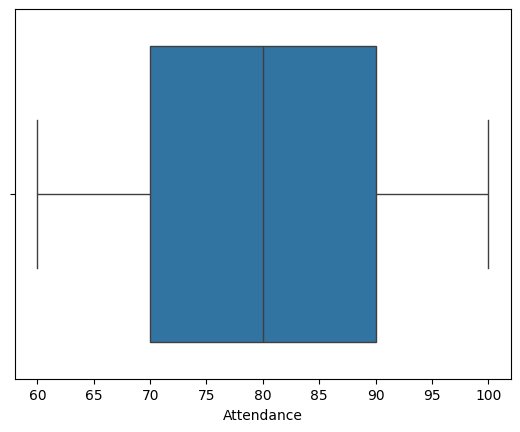

In [10]:
sns.boxplot(x = df["Attendance"])

Bisa dilihat visualisasi diatas, tidak ditemukan nilai outlier pada kolom Attendance

<Axes: xlabel='Sleep_Hours'>

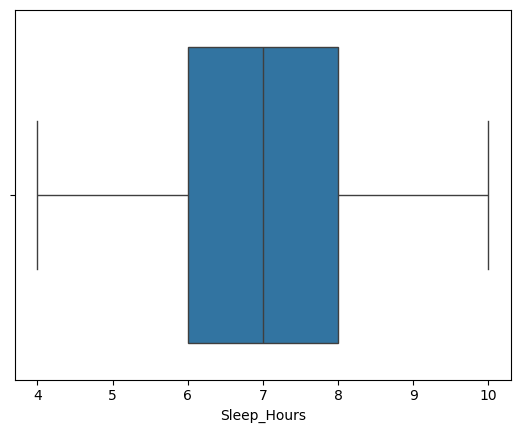

In [11]:
sns.boxplot(x = df["Sleep_Hours"])

Bisa dilihat visualisasi diatas, tidak ditemukan nilai outlier pada kolom Attendance

<Axes: xlabel='Previous_Scores'>

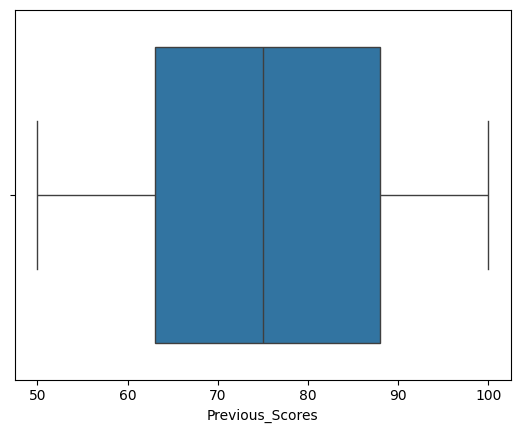

In [12]:
sns.boxplot(x = df["Previous_Scores"])

Bisa dilihat visualisasi diatas, tidak ditemukan nilai outlier pada kolom Attendance

<Axes: xlabel='Tutoring_Sessions'>

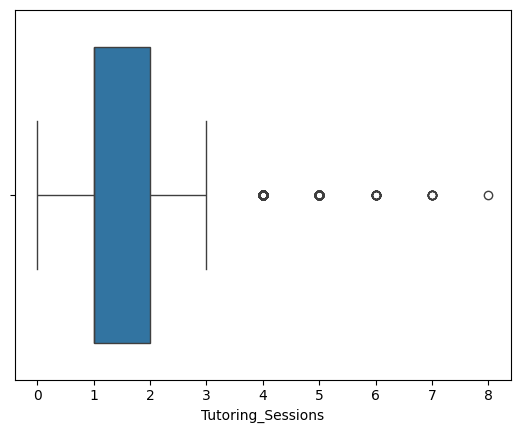

In [13]:
sns.boxplot(x = df["Tutoring_Sessions"])

Bisa dilihat visualisasi diatas, terdapat beberapa nilai outlier pada kolom Tutoring_Studied

<Axes: xlabel='Physical_Activity'>

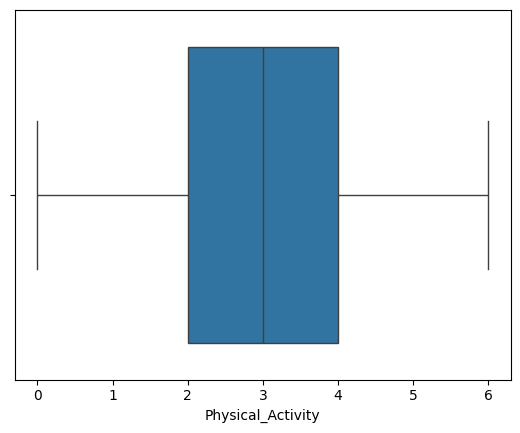

In [14]:
sns.boxplot(x = df["Physical_Activity"])

Bisa dilihat visualisasi diatas, tidak ditemukan nilai outlier pada kolom Attendance

<Axes: xlabel='Exam_Score'>

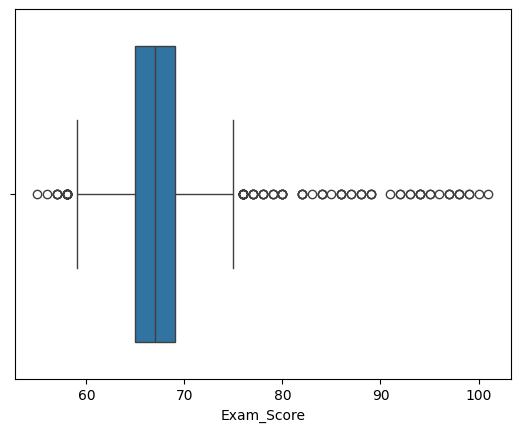

In [15]:
sns.boxplot(x = df["Exam_Score"])

Pada kolom Exam_Score, terdapat beberapa nilai outlier

Terlihat bahwa terdapat outlier pada kolom Hours_studied, Tutoring_Sessions, dan Exam_Score. dalam kasus ini, kita akan menghapus outlier menggunakan teknik **Interquartile Range (IQR)**. IQR dihitung sebagai:

IQR=Q3−Q1

dengan:

Batas Bawah:
Q1−1.5*IQR

Batas Atas:
Q3+1.5*IQR

Outlier adalah nilai yang berada di luar batas ini, dan akan dihapus dari dataset.


In [16]:
numeric_columns = df.select_dtypes(include = ["number"]).columns

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) |
         (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis =1)]

df.shape

(5836, 20)

C. MEMERIKSA DATA DUPLIKAT

Langkah selanjutnya ialah memeriksa apakah terdapat data duplikat pada dataset ini.

In [17]:
df.duplicated().sum()

0

Berdasarkan hasil diatas, tidak data duplikat dalam dataset ini.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5836 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               5836 non-null   int64 
 1   Attendance                  5836 non-null   int64 
 2   Parental_Involvement        5836 non-null   object
 3   Access_to_Resources         5836 non-null   object
 4   Extracurricular_Activities  5836 non-null   object
 5   Sleep_Hours                 5836 non-null   int64 
 6   Previous_Scores             5836 non-null   int64 
 7   Motivation_Level            5836 non-null   object
 8   Internet_Access             5836 non-null   object
 9   Tutoring_Sessions           5836 non-null   int64 
 10  Family_Income               5836 non-null   object
 11  Teacher_Quality             5836 non-null   object
 12  School_Type                 5836 non-null   object
 13  Peer_Influence              5836 non-null   object
 1

Setelah proses data cleaning, jumlah total baris data yang tersisa adalah 5.836.

# 5. EXPLORATORY DATA ANALYSIS

## A. Univariate Analysis

pada kode dibawah Membagi kolom-kolom menjadi kolom numerikal dan kolom kategorikal

In [19]:
numerical_features = ["Hours_Studied", "Attendance", "Sleep_Hours", "Previous_Scores", "Tutoring_Sessions", "Physical_Activity", "Exam_Score"]
categorical_features = ["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home", "Gender"]

1. Barplot pertama Memeriksa Fitur Parental_Involvement

                      Jumlah Sampel  Persentase
Parental_Involvement                           
Medium                         2992        51.3
High                           1677        28.7
Low                            1167        20.0


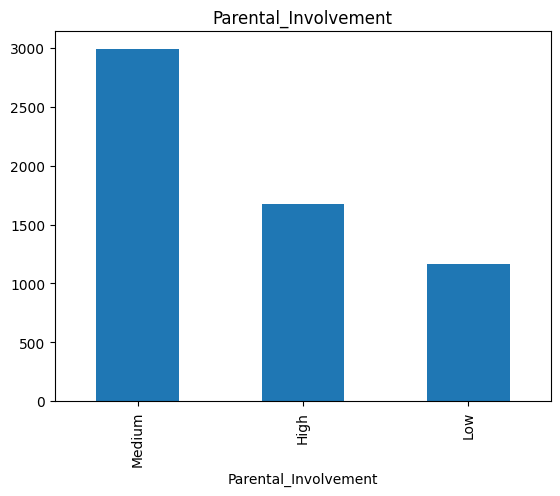

In [20]:
feature = categorical_features[0]
count_parental_involvement = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_parental_involvement = pd.DataFrame({"Jumlah Sampel": count_parental_involvement, "Persentase": percent.round(1)})
print(df_parental_involvement)
count_parental_involvement.plot(kind="bar", title=feature)
plt.xlabel("Parental_Involvement")
plt.show()

Sebagian besar sampel Parental Involvement berada pada tingkat Medium dengan jumlah 2992 yang mewakili 51,3% dari total data.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_parental_involvement:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_parental_involvement sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

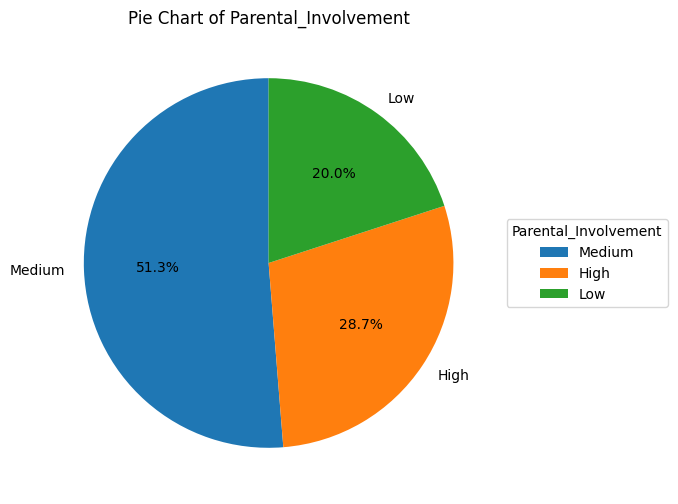

In [21]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_parental_involvement,
    labels=count_parental_involvement.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

2. Barplot kedua memerikasa fitur Access_to_Resources

                     Jumlah Sampel  Persentase
Access_to_Resources                           
Medium                        2936        50.3
High                          1737        29.8
Low                           1163        19.9


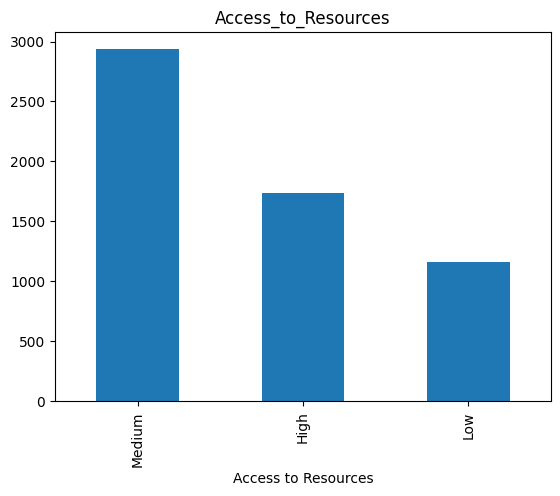

In [22]:
feature = categorical_features[1]
count_Access_to_Resources = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Access_to_Resources = pd.DataFrame({"Jumlah Sampel": count_Access_to_Resources, "Persentase": percent.round(1)})
print(df_Access_to_Resources)
count_Access_to_Resources.plot(kind="bar", title=feature)
plt.xlabel("Access to Resources")
plt.show()

Sebagian besar sampel Access_to_Resources berada pada tingkat Medium dengan jumlah 2963 yang mewakili 50,3% dari total data.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Access_to_Resources:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Access_to_Resources sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

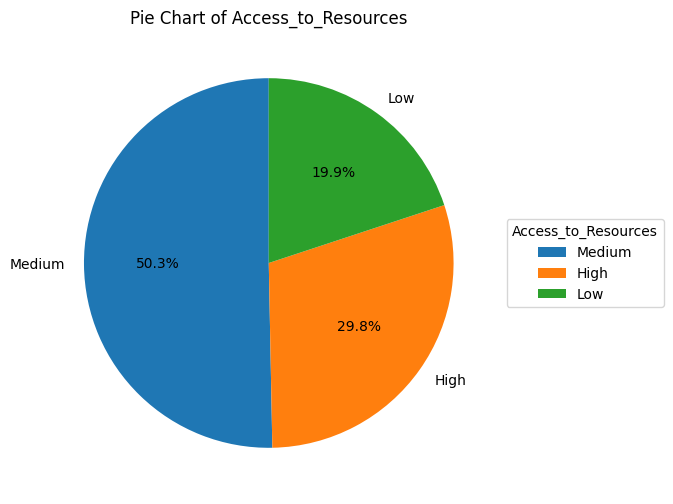

In [23]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Access_to_Resources,
    labels=count_Access_to_Resources.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

3. Barplot ketiga Memeriksa Fitur Extracurricular Activities

                            Jumlah Sampel  Persentase
Extracurricular_Activities                           
Yes                                  3480        59.6
No                                   2356        40.4


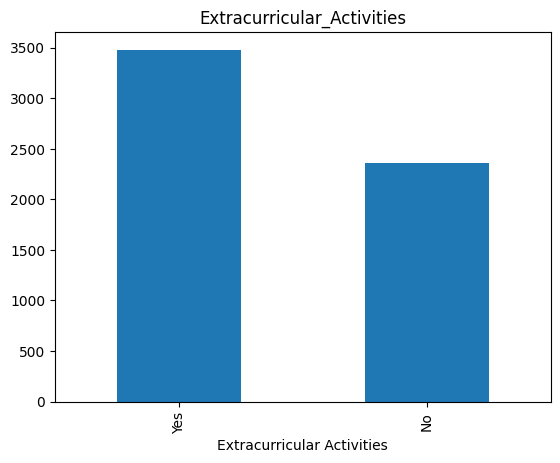

In [24]:
feature = categorical_features[2]
count_Extracurricular_Activities = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Extracurricular_Activities = pd.DataFrame({"Jumlah Sampel": count_Extracurricular_Activities, "Persentase": percent.round(1)})
print(df_Extracurricular_Activities)
count_Extracurricular_Activities.plot(kind="bar", title=feature)
plt.xlabel("Extracurricular Activities")
plt.show()

siswa yang mengikuti kegiatan ekstrakurikuler memiliki jumlah yang lebih banyak dari pada siswa yang tidak mengikuti ekstrakurikuler.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Extracurricular:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Access_to_Resources sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

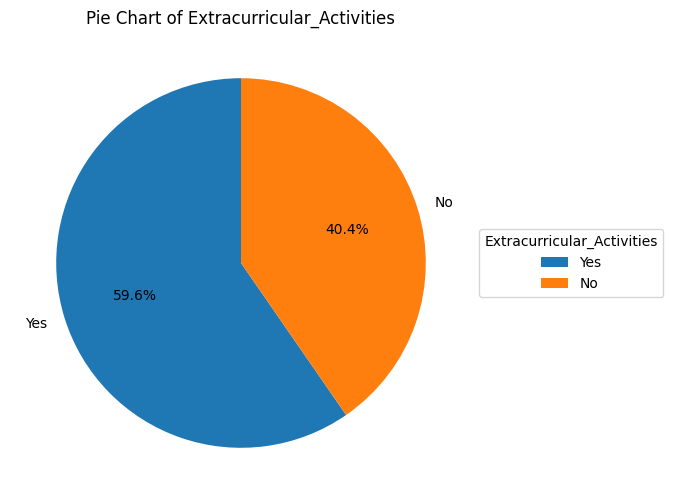

In [25]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Extracurricular_Activities,
    labels=count_Extracurricular_Activities.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

4. Barplot keempat Memeriksa Fitur Motivation Level

                  Jumlah Sampel  Persentase
Motivation_Level                           
Medium                     2967        50.8
Low                        1707        29.2
High                       1162        19.9


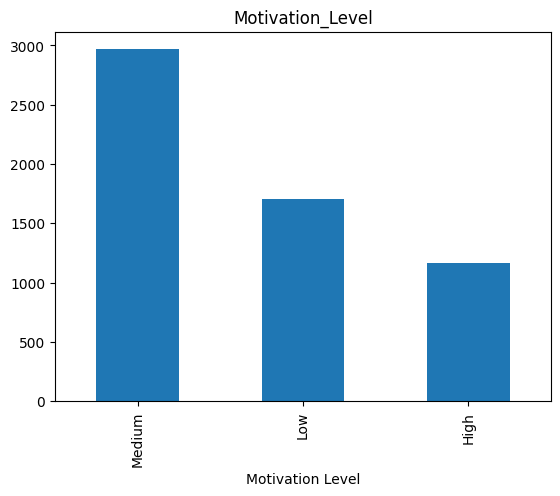

In [26]:
feature = categorical_features[3]
count_Motivation_Level = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Motivation_Level = pd.DataFrame({"Jumlah Sampel": count_Motivation_Level, "Persentase": percent.round(1)})
print(df_Motivation_Level)
count_Motivation_Level.plot(kind="bar", title=feature)
plt.xlabel("Motivation Level")
plt.show()

Sebagian besar sampel Motivation Level berada pada tingkat Medium dengan jumlah 2967 yang mewakili 50,8% dari total data.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Motivation_Level:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Motivation_Level sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

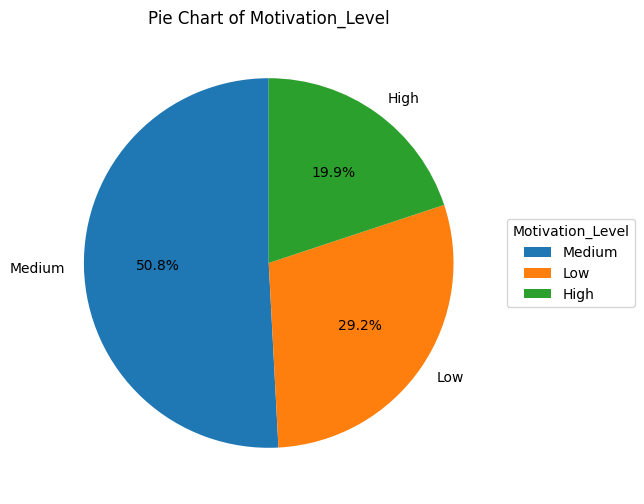

In [27]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Motivation_Level,
    labels=count_Motivation_Level.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

5. Barplot kelima Memeriksa Fitur Internet Access

                 Jumlah Sampel  Persentase
Internet_Access                           
Yes                       5387        92.3
No                         449         7.7


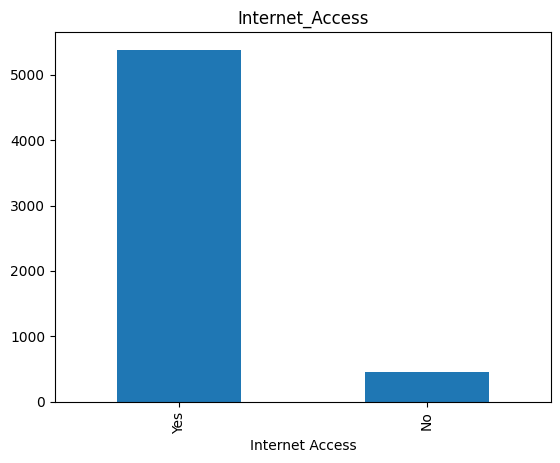

In [28]:
feature = categorical_features[4]
count_Internet_Access = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Internet_Access = pd.DataFrame({"Jumlah Sampel": count_Internet_Access, "Persentase": percent.round(1)})
print(df_Internet_Access)
count_Internet_Access.plot(kind="bar", title=feature)
plt.xlabel("Internet Access")
plt.show()

siswa yang memiliki akses internet memiliki jumlah yang lebih banyak dari pada siswa yang tidak memiliki akses internet.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Internet_Access:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Internet_Access sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

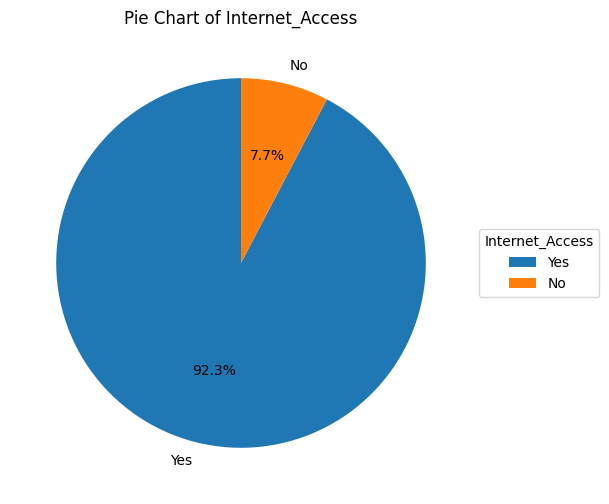

In [29]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Internet_Access,
    labels=count_Internet_Access.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

6. Barplot keenam Memeriksa Fitur Family Income

               Jumlah Sampel  Persentase
Family_Income                           
Medium                  2364        40.5
Low                     2353        40.3
High                    1119        19.2


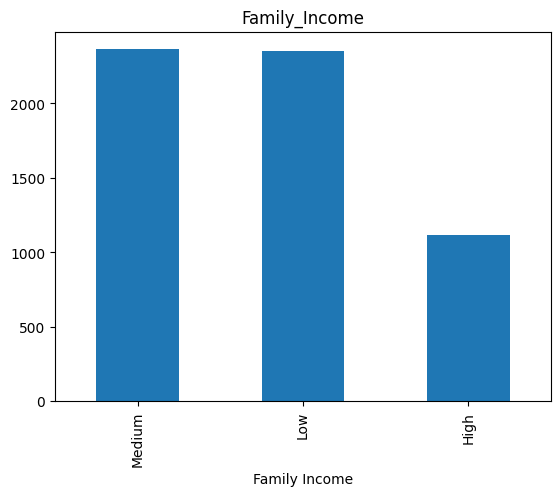

In [30]:
feature = categorical_features[5]
count_Family_Income = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Family_Income = pd.DataFrame({"Jumlah Sampel": count_Family_Income, "Persentase": percent.round(1)})
print(df_Family_Income)
count_Family_Income.plot(kind="bar", title=feature)
plt.xlabel("Family Income")
plt.show()

Sebagian besar sampel Family Income berada pada tingkat Medium dengan jumlah 2364 yang mewakili 40,5% dari total data.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Family_Income:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Family_Income sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

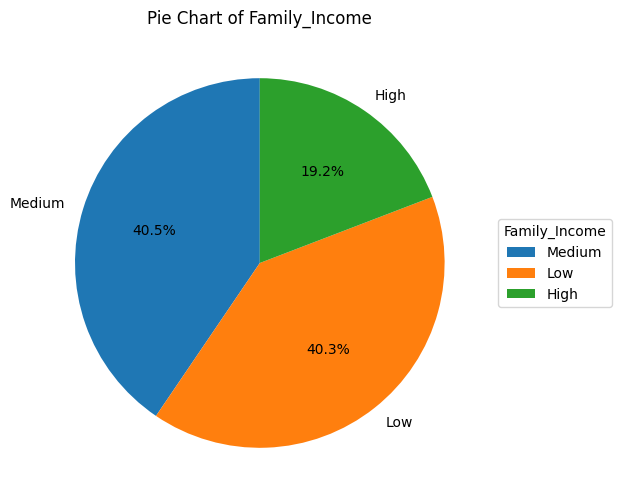

In [31]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Family_Income,
    labels=count_Family_Income.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

7. Barplot ketujuh Memeriksa Fitur Teacher Quality

                 Jumlah Sampel  Persentase
Teacher_Quality                           
Medium                    3499        60.0
High                      1750        30.0
Low                        587        10.1


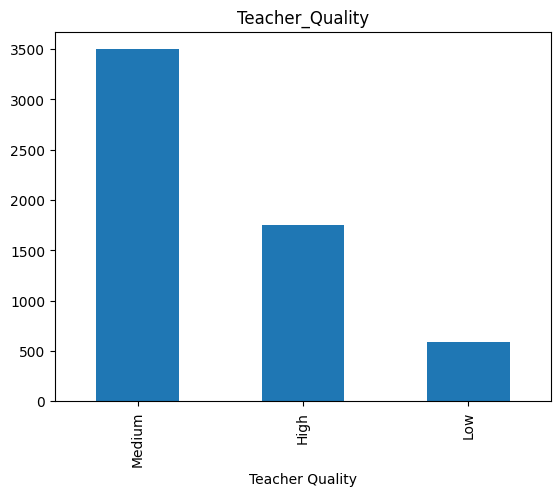

In [32]:
feature = categorical_features[6]
count_Teacher_Quality = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Teacher_Quality = pd.DataFrame({"Jumlah Sampel": count_Teacher_Quality, "Persentase": percent.round(1)})
print(df_Teacher_Quality)
count_Teacher_Quality.plot(kind="bar", title=feature)
plt.xlabel("Teacher Quality")
plt.show()

Sebagian besar sampel Persepsi siswa terhadap kualitas pengajaran guru berada pada tingkat Medium dengan jumlah 3499 yang mewakili 60% dari total data.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Teacher_Quality:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Teacher_Quality sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

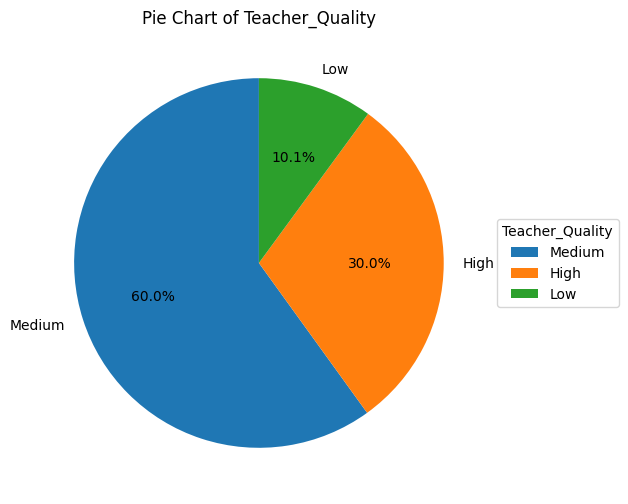

In [33]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Teacher_Quality,
    labels=count_Teacher_Quality.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

8. Barplot kedelapan Memeriksa Fitur School Type

             Jumlah Sampel  Persentase
School_Type                           
Public                4061        69.6
Private               1775        30.4


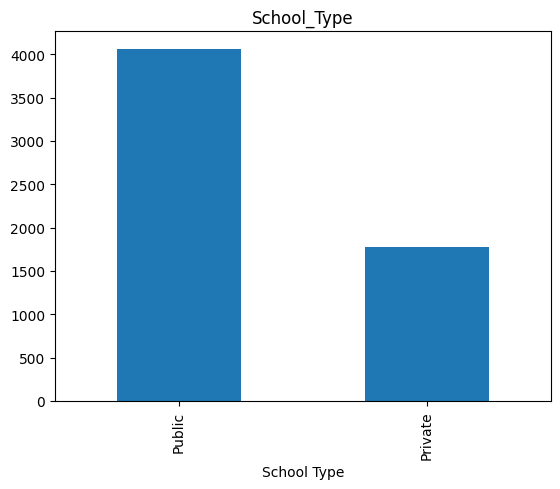

In [34]:
feature = categorical_features[7]
count_School_Type = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_School_Type = pd.DataFrame({"Jumlah Sampel": count_School_Type, "Persentase": percent.round(1)})
print(df_School_Type)
count_School_Type.plot(kind="bar", title=feature)
plt.xlabel("School Type")
plt.show()

School Type dengan kategori Public memiliki jumlah yang lebih banyak dari pada kategori Private.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_parental_involvement:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_School_Type sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

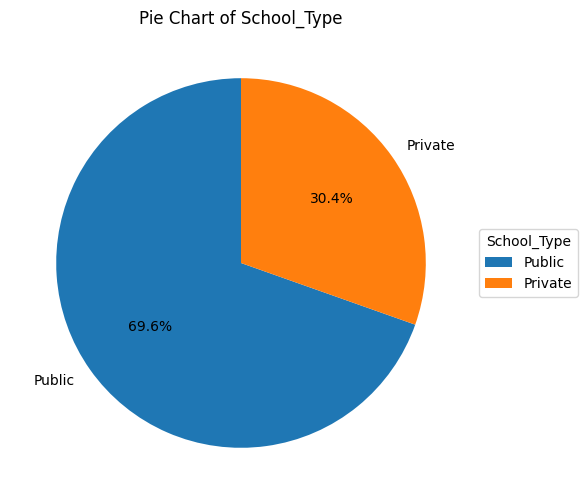

In [35]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_School_Type,
    labels=count_School_Type.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

9. Barplot kesembilan Memeriksa Fitur Peer Influence

                Jumlah Sampel  Persentase
Peer_Influence                           
Positive                 2332        40.0
Neutral                  2288        39.2
Negative                 1216        20.8


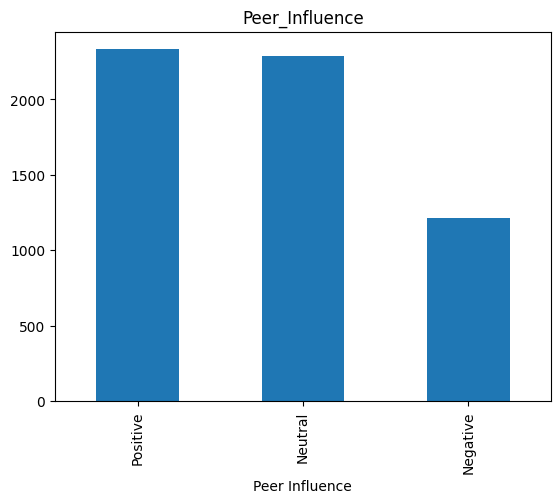

In [36]:
feature = categorical_features[8]
count_Peer_Influence = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Peer_Influence = pd.DataFrame({"Jumlah Sampel": count_Peer_Influence, "Persentase": percent.round(1)})
print(df_Peer_Influence)
count_Peer_Influence.plot(kind="bar", title=feature)
plt.xlabel("Peer Influence")
plt.show()

sebagian besar sampel memiliki pengaruh teman yang positif atau netral, sementara pengaruh negatif relatif lebih kecil.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Peer_Influence:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Peer_Influence sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

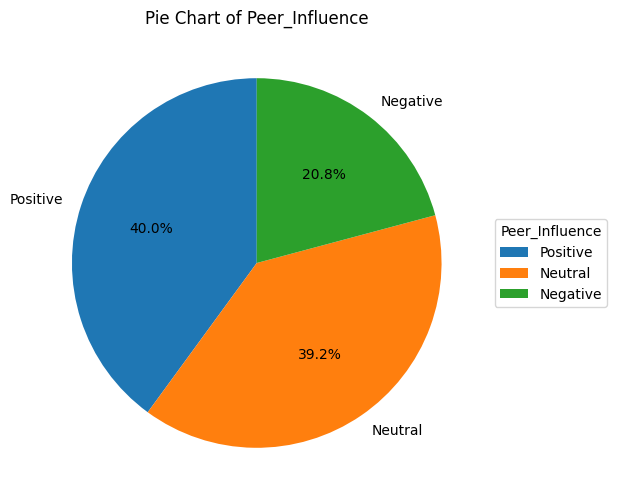

In [37]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Peer_Influence,
    labels=count_Peer_Influence.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

10. Barplot pertama Memeriksa Fitur Learning Disabilities

                       Jumlah Sampel  Persentase
Learning_Disabilities                           
No                              5241        89.8
Yes                              595        10.2


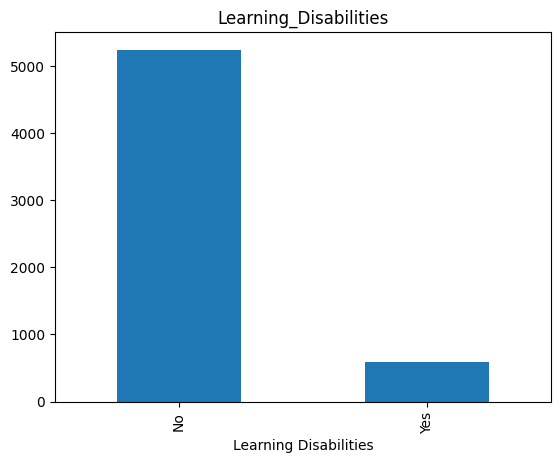

In [38]:
feature = categorical_features[9]
count_Learning_Disabilities = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Learning_Disabilities = pd.DataFrame({"Jumlah Sampel": count_Learning_Disabilities, "Persentase": percent.round(1)})
print(df_Learning_Disabilities)
count_Learning_Disabilities.plot(kind="bar", title=feature)
plt.xlabel("Learning Disabilities")
plt.show()

Sebagian besar sampel tidak memiliki gangguan belajar.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Learning_Disablities:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Learning_Disabilities sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

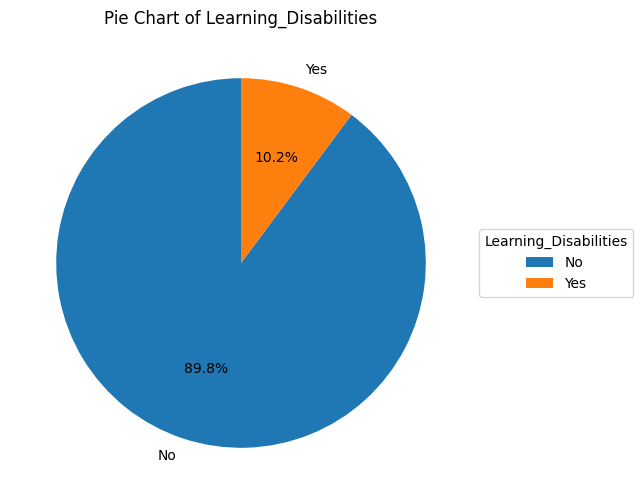

In [39]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Learning_Disabilities,
    labels=count_Learning_Disabilities.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

11. Barplot sebelas Memeriksa Fitur Parental Education Level

                          Jumlah Sampel  Persentase
Parental_Education_Level                           
High School                        2892        49.6
College                            1766        30.3
Postgraduate                       1178        20.2


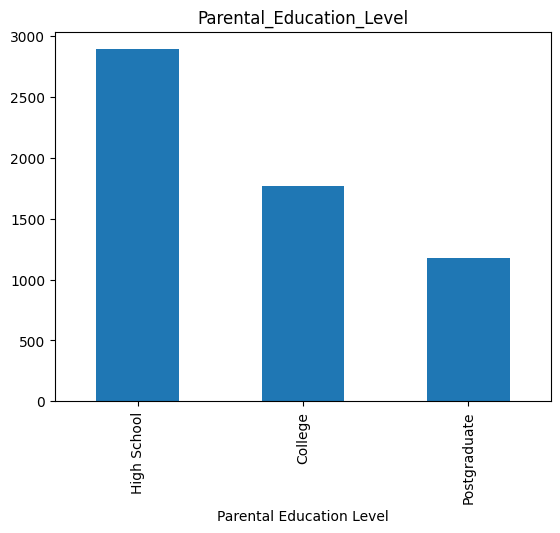

In [40]:
feature = categorical_features[10]
count_Parental_Education_Level = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Parental_Education_Level = pd.DataFrame({"Jumlah Sampel": count_Parental_Education_Level, "Persentase": percent.round(1)})
print(df_Parental_Education_Level)
count_Parental_Education_Level.plot(kind="bar", title=feature)
plt.xlabel("Parental Education Level")
plt.show()

Sebagian besar orang tua memiliki tingkat pendidikan setara High School, sementara tingkat Postgraduate merupakan yang paling sedikit.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Parental_Education_Level:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Parental_Education_Level sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

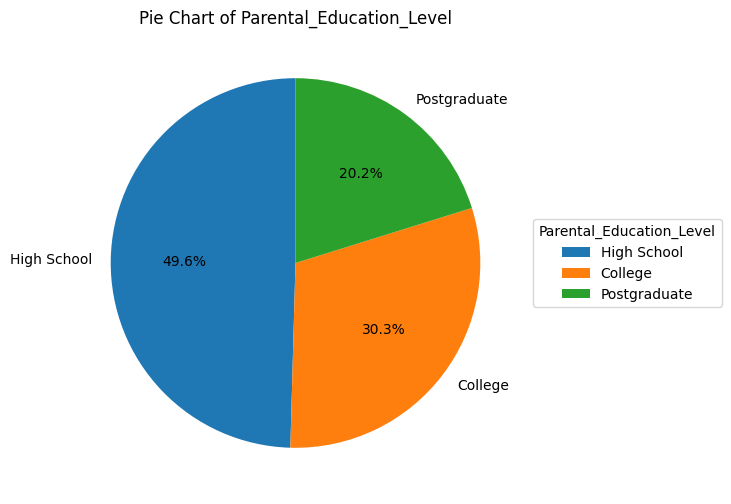

In [41]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Parental_Education_Level,
    labels=count_Parental_Education_Level.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

12. Barplot duabelas Memeriksa Fitur Distance from Home

                    Jumlah Sampel  Persentase
Distance_from_Home                           
Near                         3479        59.6
Moderate                     1779        30.5
Far                           578         9.9


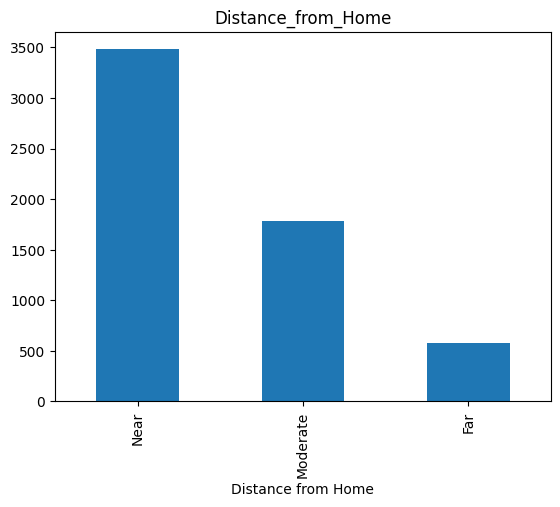

In [42]:
feature = categorical_features[11]
count_Distance_from_Home = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Distance_from_Home = pd.DataFrame({"Jumlah Sampel": count_Distance_from_Home, "Persentase": percent.round(1)})
print(df_Distance_from_Home)
count_Distance_from_Home.plot(kind="bar", title=feature)
plt.xlabel("Distance from Home")
plt.show()

Mayoritas dalam sampel memiliki jarak rumah yang dekat dengan lokasi yang dianalisis, yaitu 59.6% dari total sampel. Sementara itu, sekitar 30.5% memiliki jarak yang sedang, dan hanya 9.9% yang memiliki jarak jauh.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Distance_from_Home:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Distance_from_Home sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

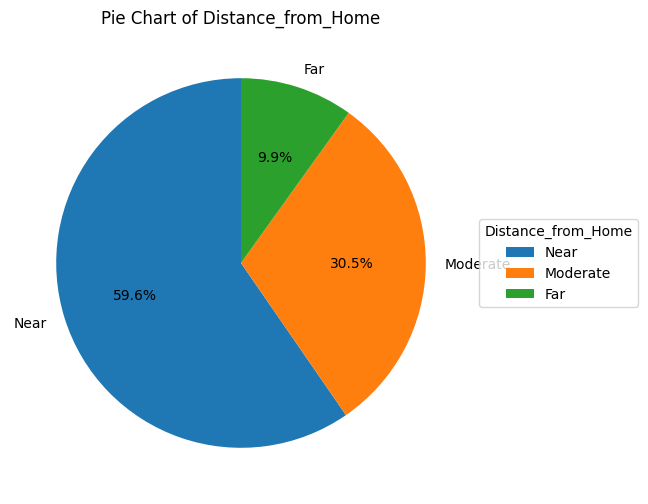

In [43]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Distance_from_Home,
    labels=count_Distance_from_Home.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

13. Barplot tigabelas Memeriksa Fitur Gender

        Jumlah Sampel  Persentase
Gender                           
Male             3370        57.7
Female           2466        42.3


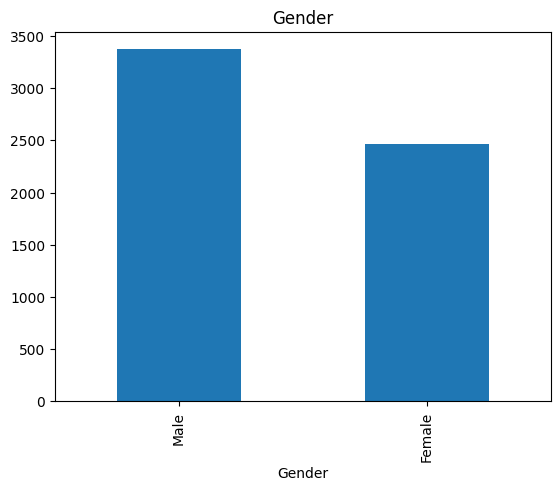

In [44]:
feature = categorical_features[12]
count_Gender = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
df_Gender = pd.DataFrame({"Jumlah Sampel": count_Gender, "Persentase": percent.round(1)})
print(df_Gender)
count_Gender.plot(kind="bar", title=feature)
plt.xlabel("Gender")
plt.show()

jumlah pria lebih banyak dari jumlah perempuan.

Pada kode dibawah ini digunakan untuk membuat diagram pie berdasarkan data pada variabel count_Gender:

1. plt.pie(): Membuat diagram pie dengan:
  - Nilai dari count_Gender sebagai ukuran.
  - Label berdasarkan indeksnya.
  - Menampilkan persentase pada tiap bagian dengan format %1.1f%%.
  - Memutar diagram mulai dari sudut 90 derajat (startangle=90).

2. plt.title(): Memberikan judul pada diagram pie.
3. plt.legend(): Menambahkan legenda di sisi kiri diagram.

4. plt.show(): Menampilkan diagram pie.

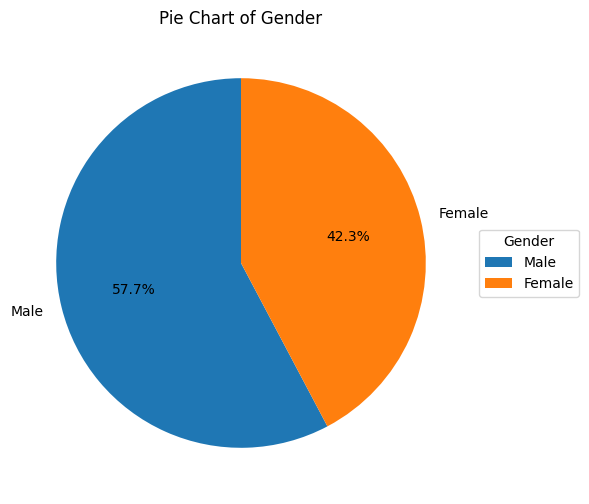

In [45]:
plt.figure(figsize=(8, 6))
plt.pie(
    count_Gender,
    labels=count_Gender.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title(f"Pie Chart of {feature}")
plt.legend(title=feature, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

Saya juga menggunakan histogram untuk menganalisis data, karena grafik ini memudahkan saya melihat distribusi dan pola data dengan jelas, sehingga bisa menarik kesimpulan yang lebih tepat.

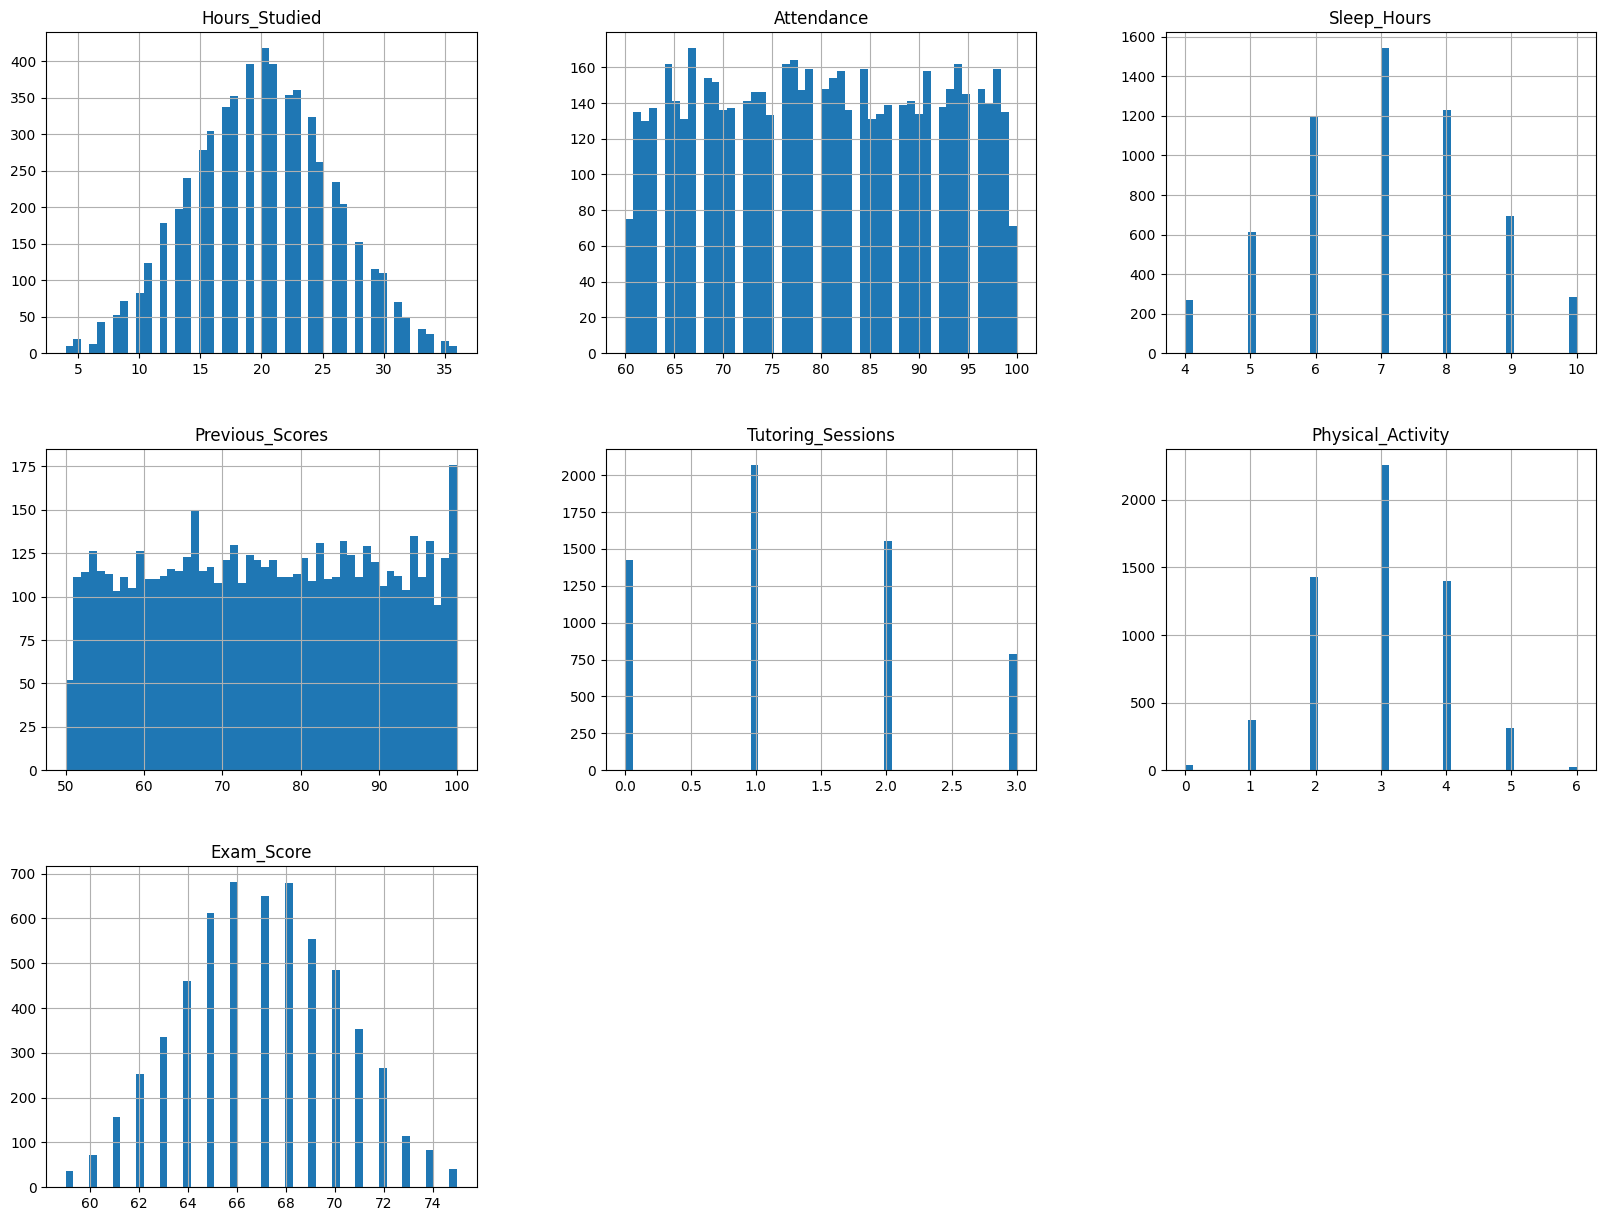

In [46]:
df.hist(bins = 50, figsize = (20, 15))
plt.show()

Sebagian besar siswa belajar sekitar 15-25 jam per minggu, dengan distribusi waktu belajar yang menyerupai pola normal. Kehadiran siswa di kelas cukup merata, berada di kisaran 60-100 persen. Mayoritas siswa tidur 7-8 jam, sesuai dengan durasi tidur yang ideal. Nilai sebelumnya menunjukkan tren meningkat, dengan lonjakan signifikan pada nilai tertinggi (100). Banyak siswa tidak mengikuti sesi bimbingan belajar, tetapi bagi yang mengikuti, mereka cenderung menghadiri 1-3 sesi. Aktivitas fisik siswa didominasi oleh tingkat sedang, dengan puncak di tingkat aktivitas 3. Nilai ujian juga menunjukkan distribusi normal, dengan mayoritas siswa mendapatkan nilai rata-rata sekitar 68-70.

## B. MULTIVARIATE ANALYSIS

Kode dibawah ini membuat barplot untuk menampilkan rata-rata Exam_Score berdasarkan setiap kolom kategori. Data dikelompokkan, dihitung rata-ratanya, diurutkan, lalu divisualisasikan. Nilai rata-rata ditampilkan di atas batang, dengan judul, label sumbu, dan garis bantu untuk memperjelas informasi.

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


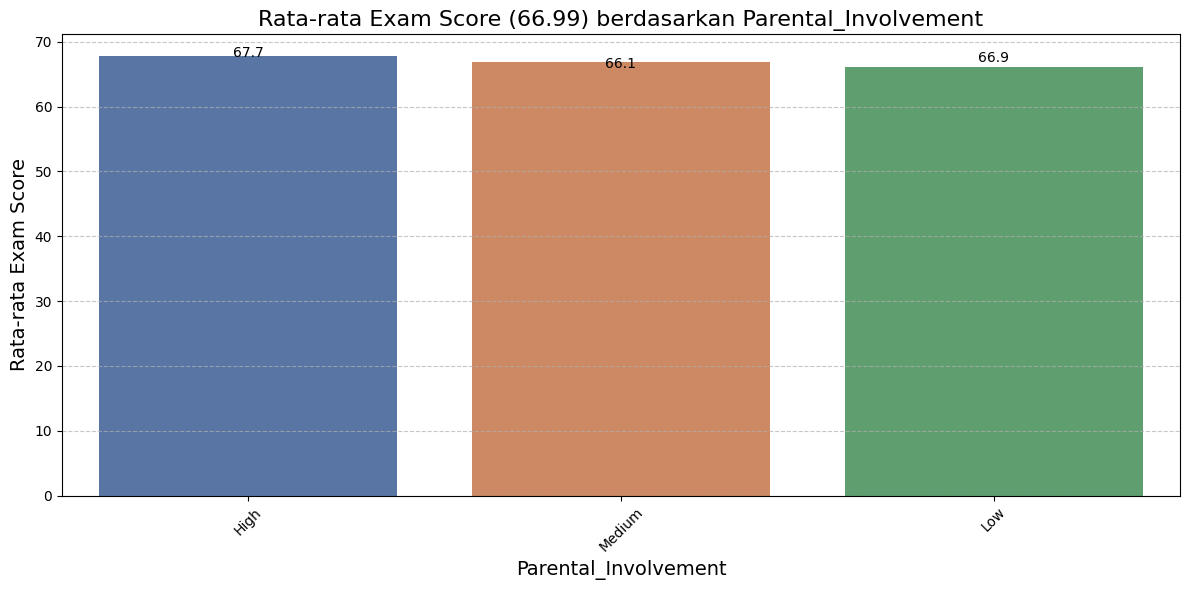

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


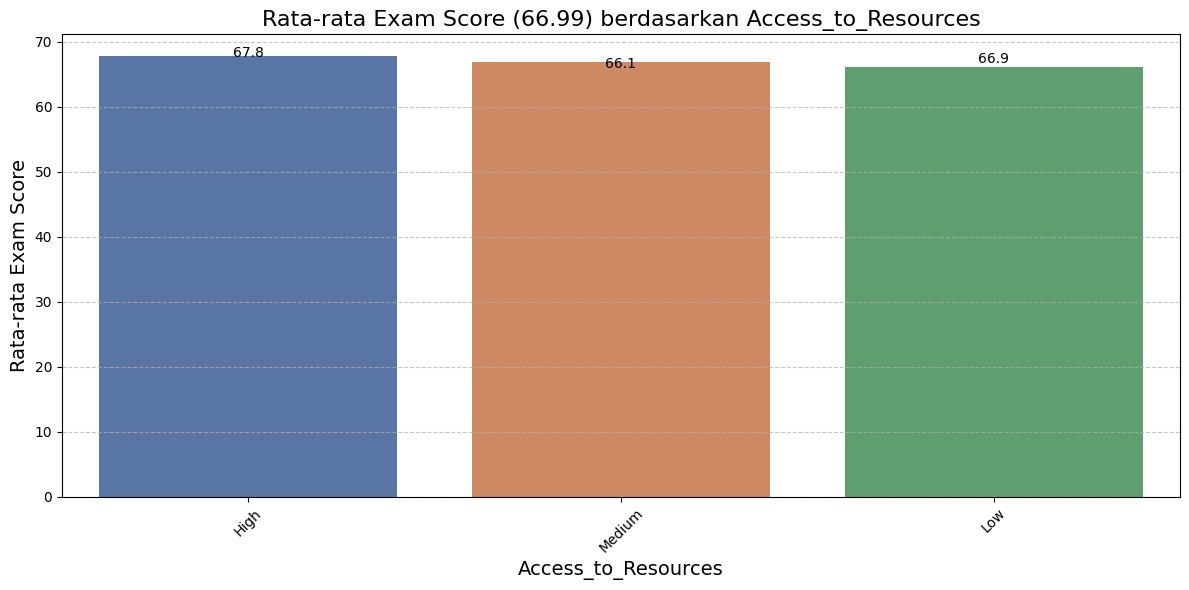

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


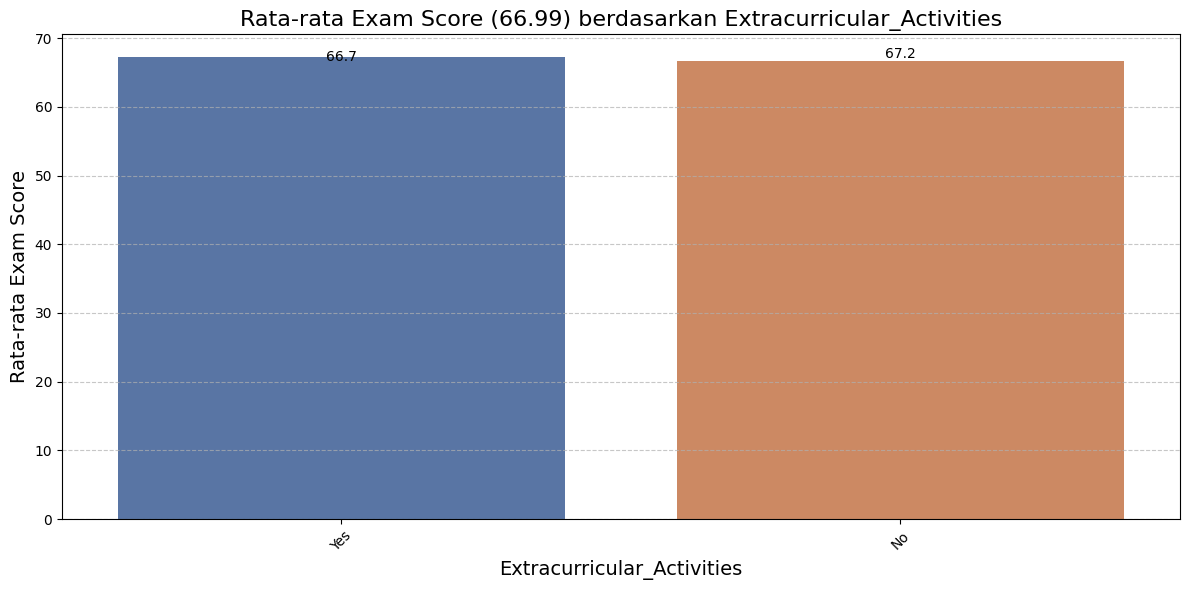

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


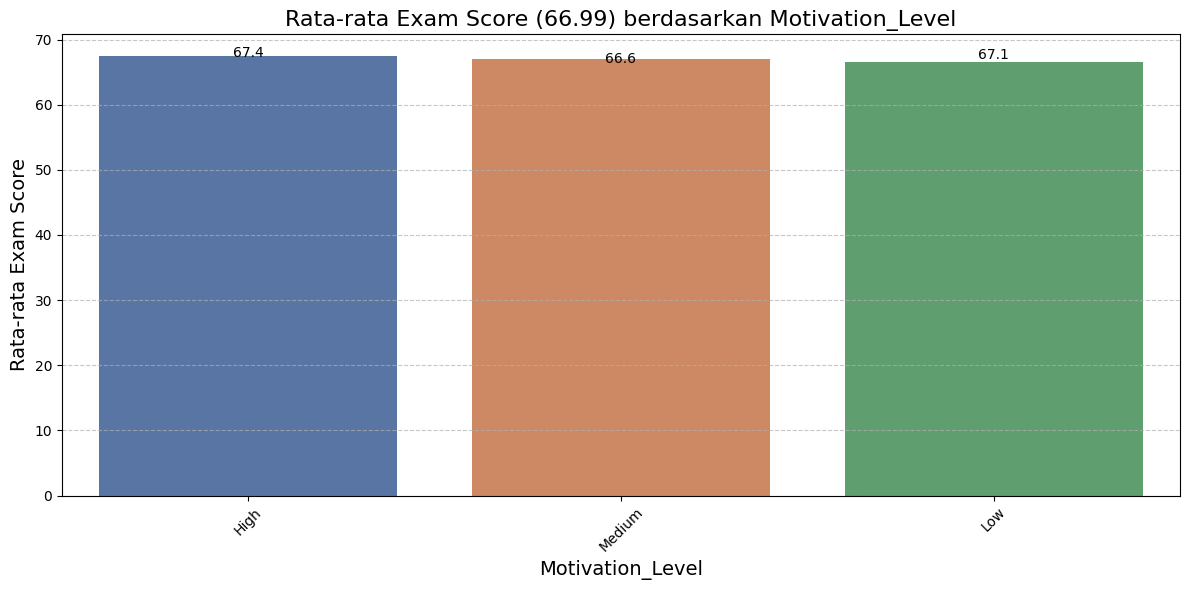

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


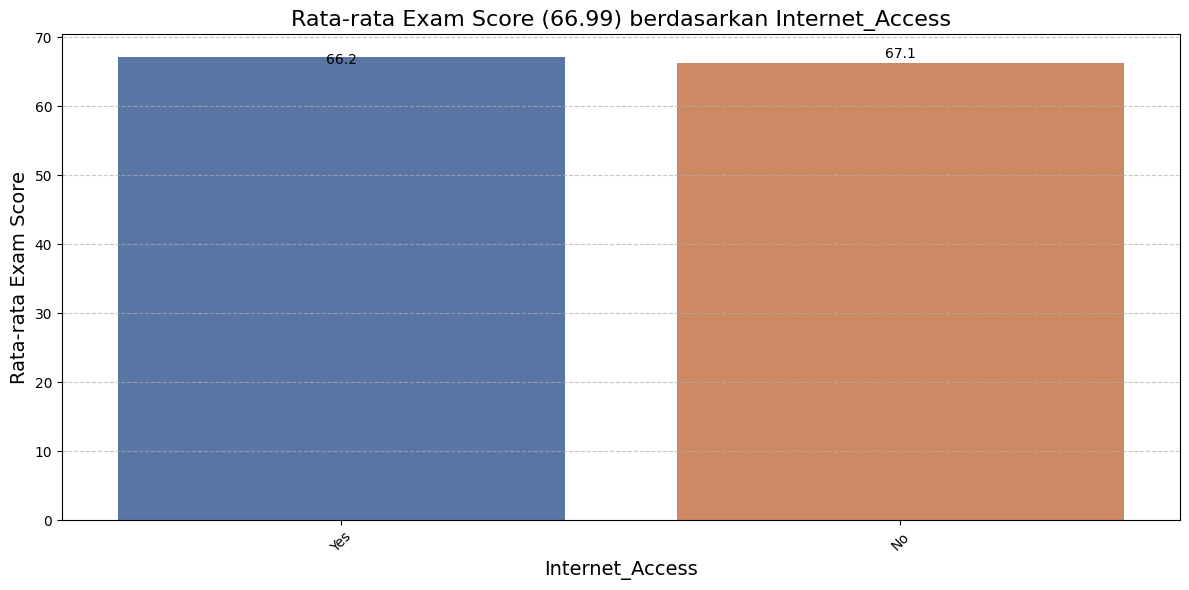

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


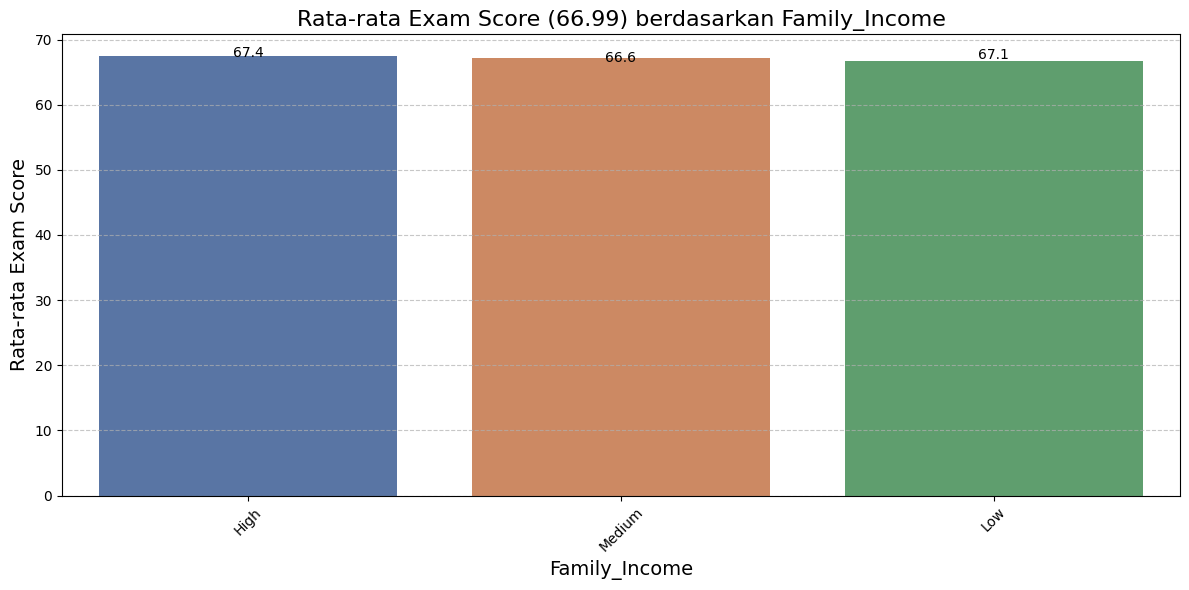

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


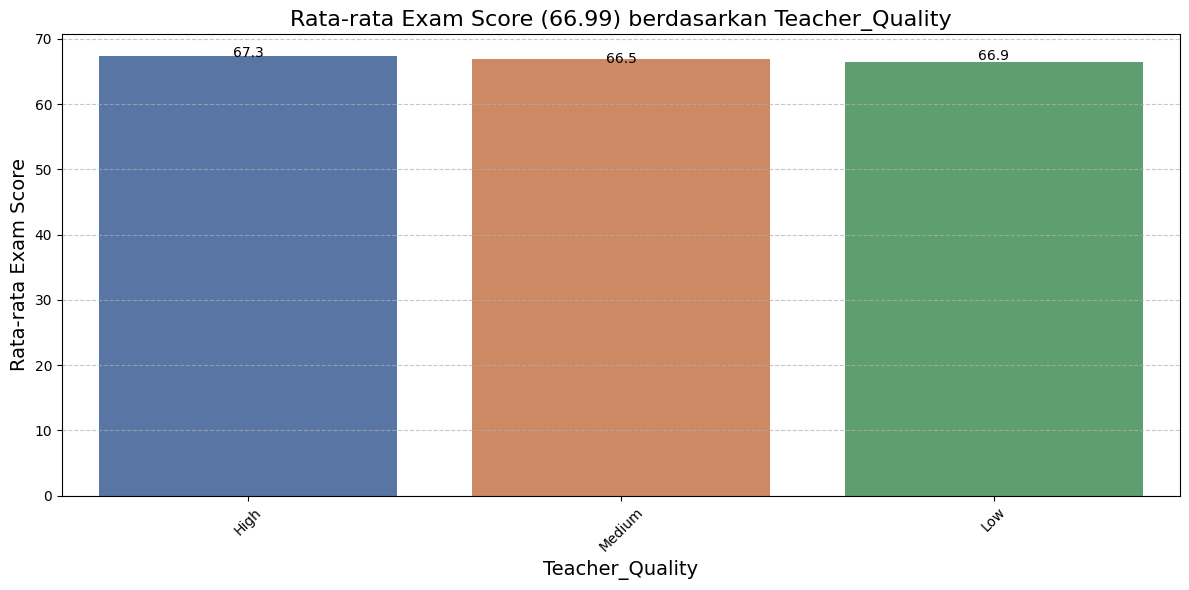

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


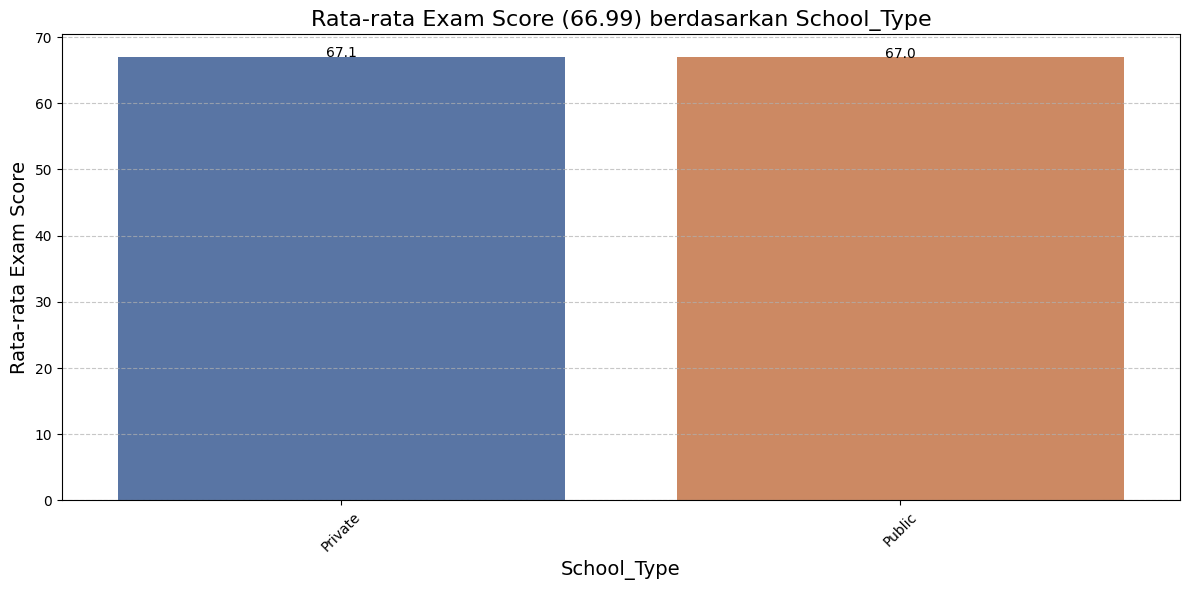

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


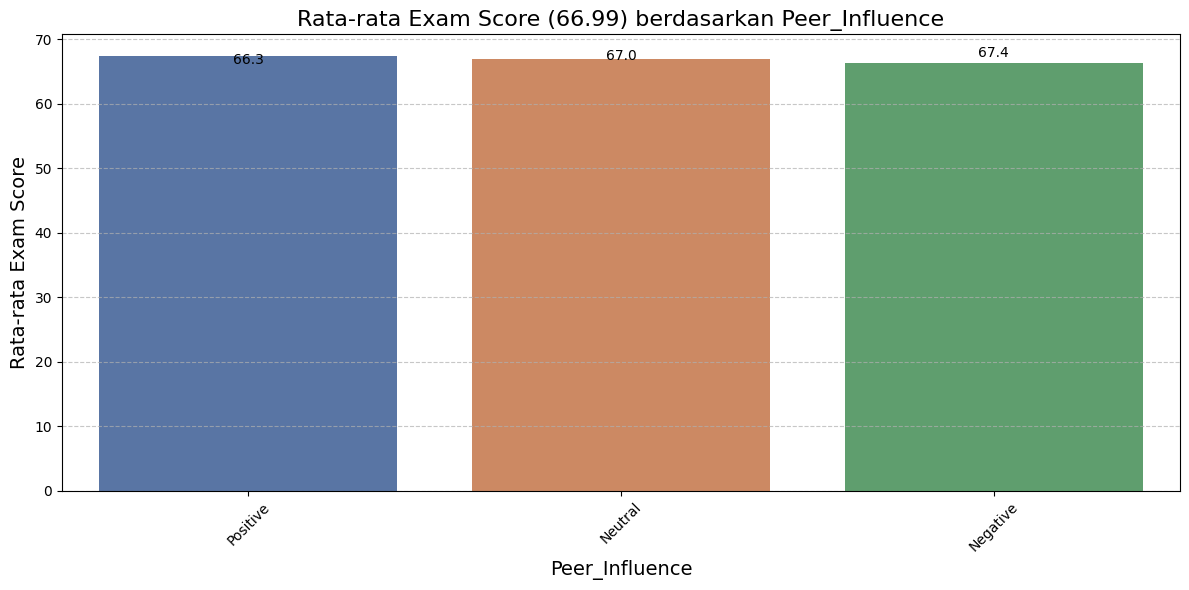

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


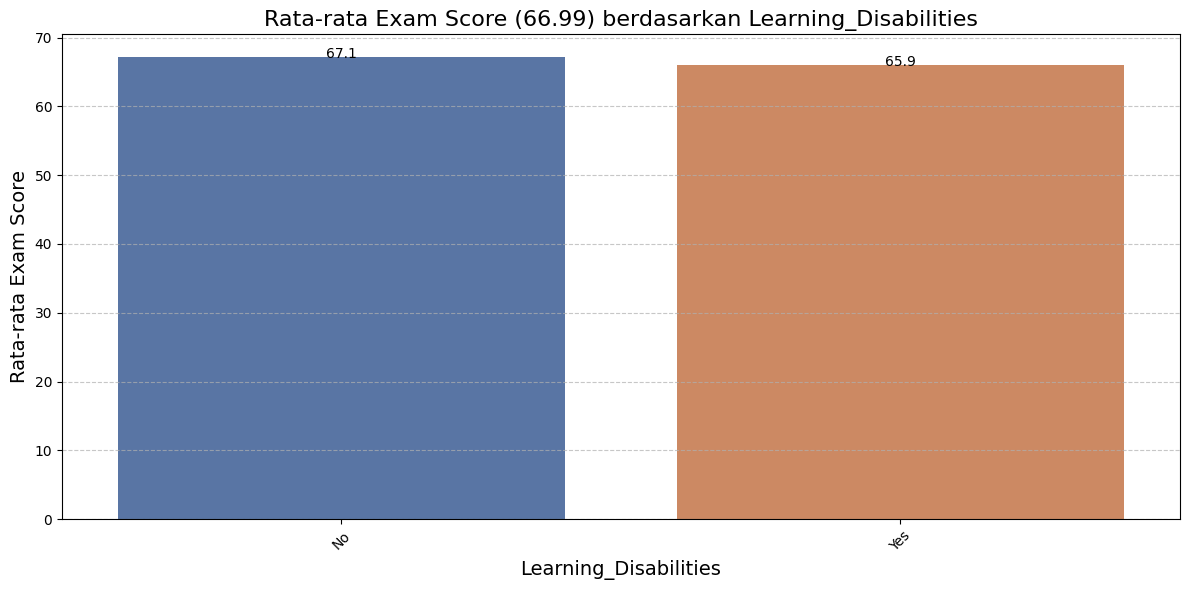

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


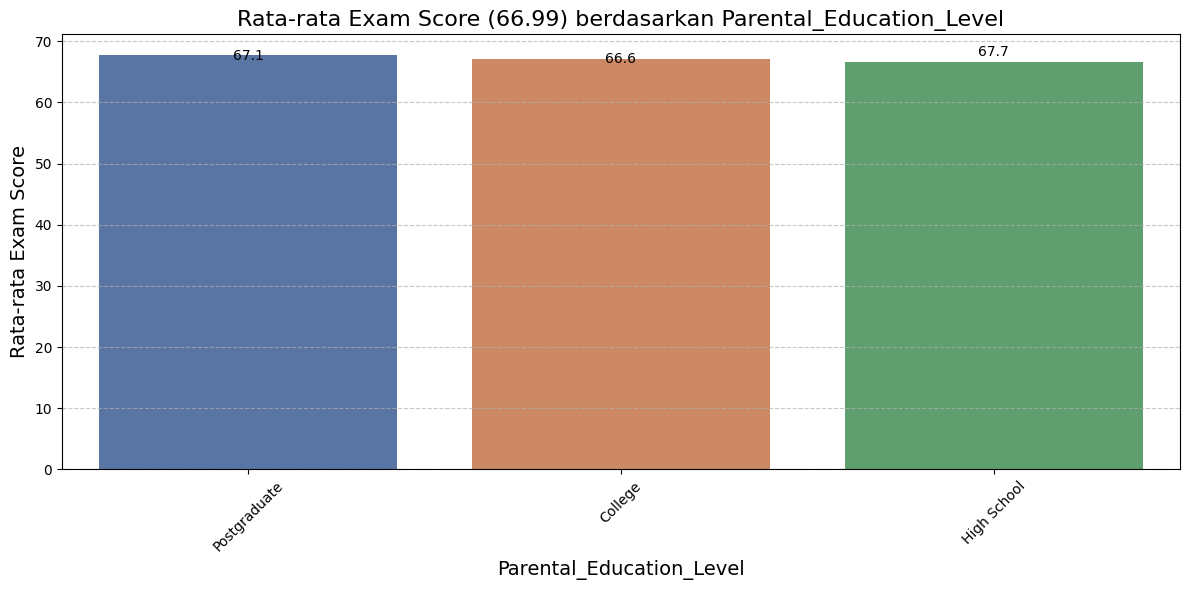

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


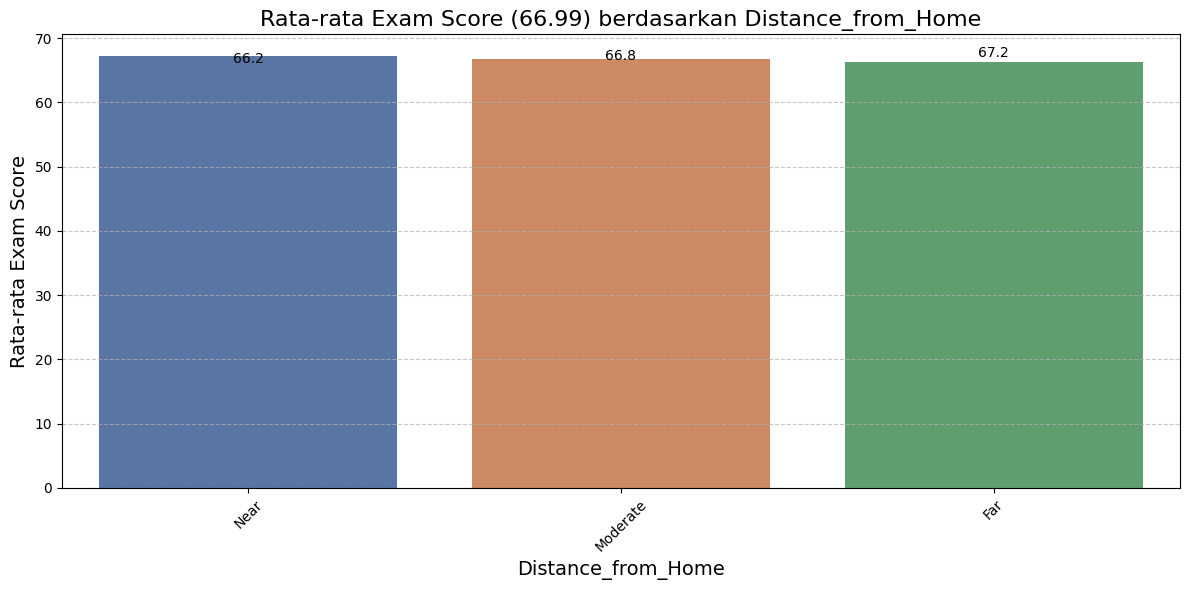

<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-47-a7ddb5973084>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


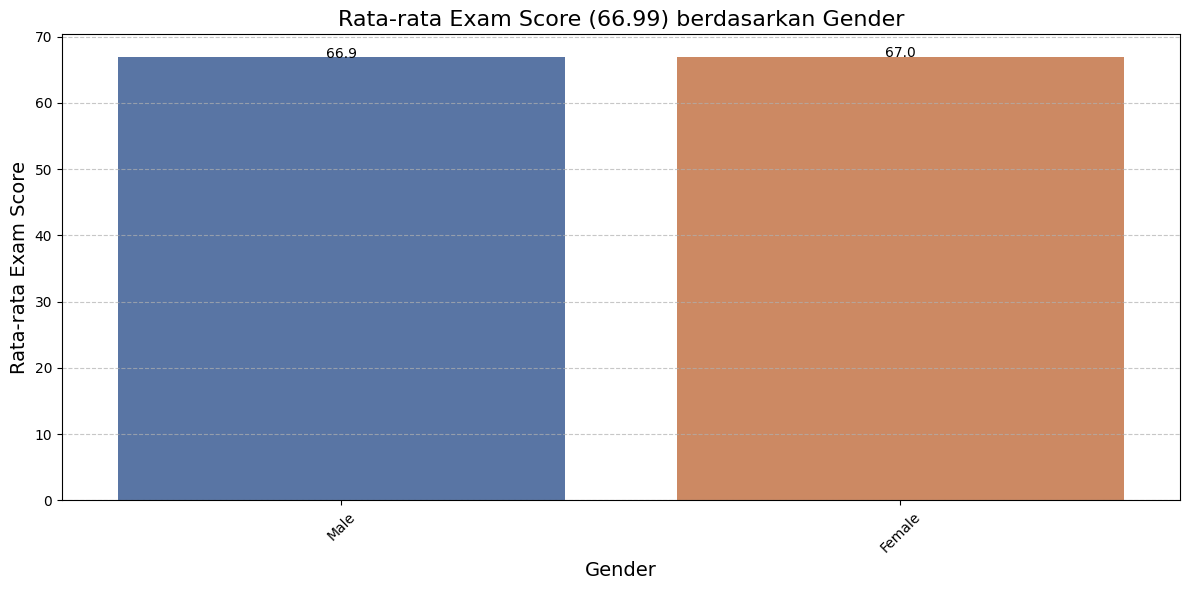

In [47]:
cat_features = df.select_dtypes(include="object").columns.to_list()

for col in cat_features:
    agg_data = df.groupby(col)['Exam_Score'].mean().reset_index()
    agg_data = agg_data.sort_values(by='Exam_Score', ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(
        x=col, y="Exam_Score", data=df, palette="deep", ci=None,
        order=agg_data[col]
    )

    for i, row in agg_data.iterrows():
        plt.text(
            x=i,
            y=row['Exam_Score'] + 0.5,
            s=f"{row['Exam_Score']:.1f}",
            ha='center', va='center', fontsize=10, color='black'
        )

    plt.title(f"Rata-rata Exam Score ({df['Exam_Score'].mean():.2f}) berdasarkan {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Rata-rata Exam Score", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Dari bar plot diatas ini, dapat disimpulkan bahwa siswa dengan tingkat Access_to_Resources yang tinggi memiliki rata-rata Exam Score tertinggi sebesar 67.8. Hal ini menunjukkan bahwa ketersediaan sumber daya pendidikan yang tinggi cenderung memberikan dampak positif terhadap hasil ujian siswa.

Kode dibawah ini digunakan untuk membuat pairplot dengan Seaborn untuk melihat hubungan antara fitur numerik dalam dataset df. Diagonal grafik menampilkan distribusi data menggunakan Kernel Density Estimation (KDE). Visualisasi ini membantu memahami korelasi dan pola antar fitur secara lebih mudah.

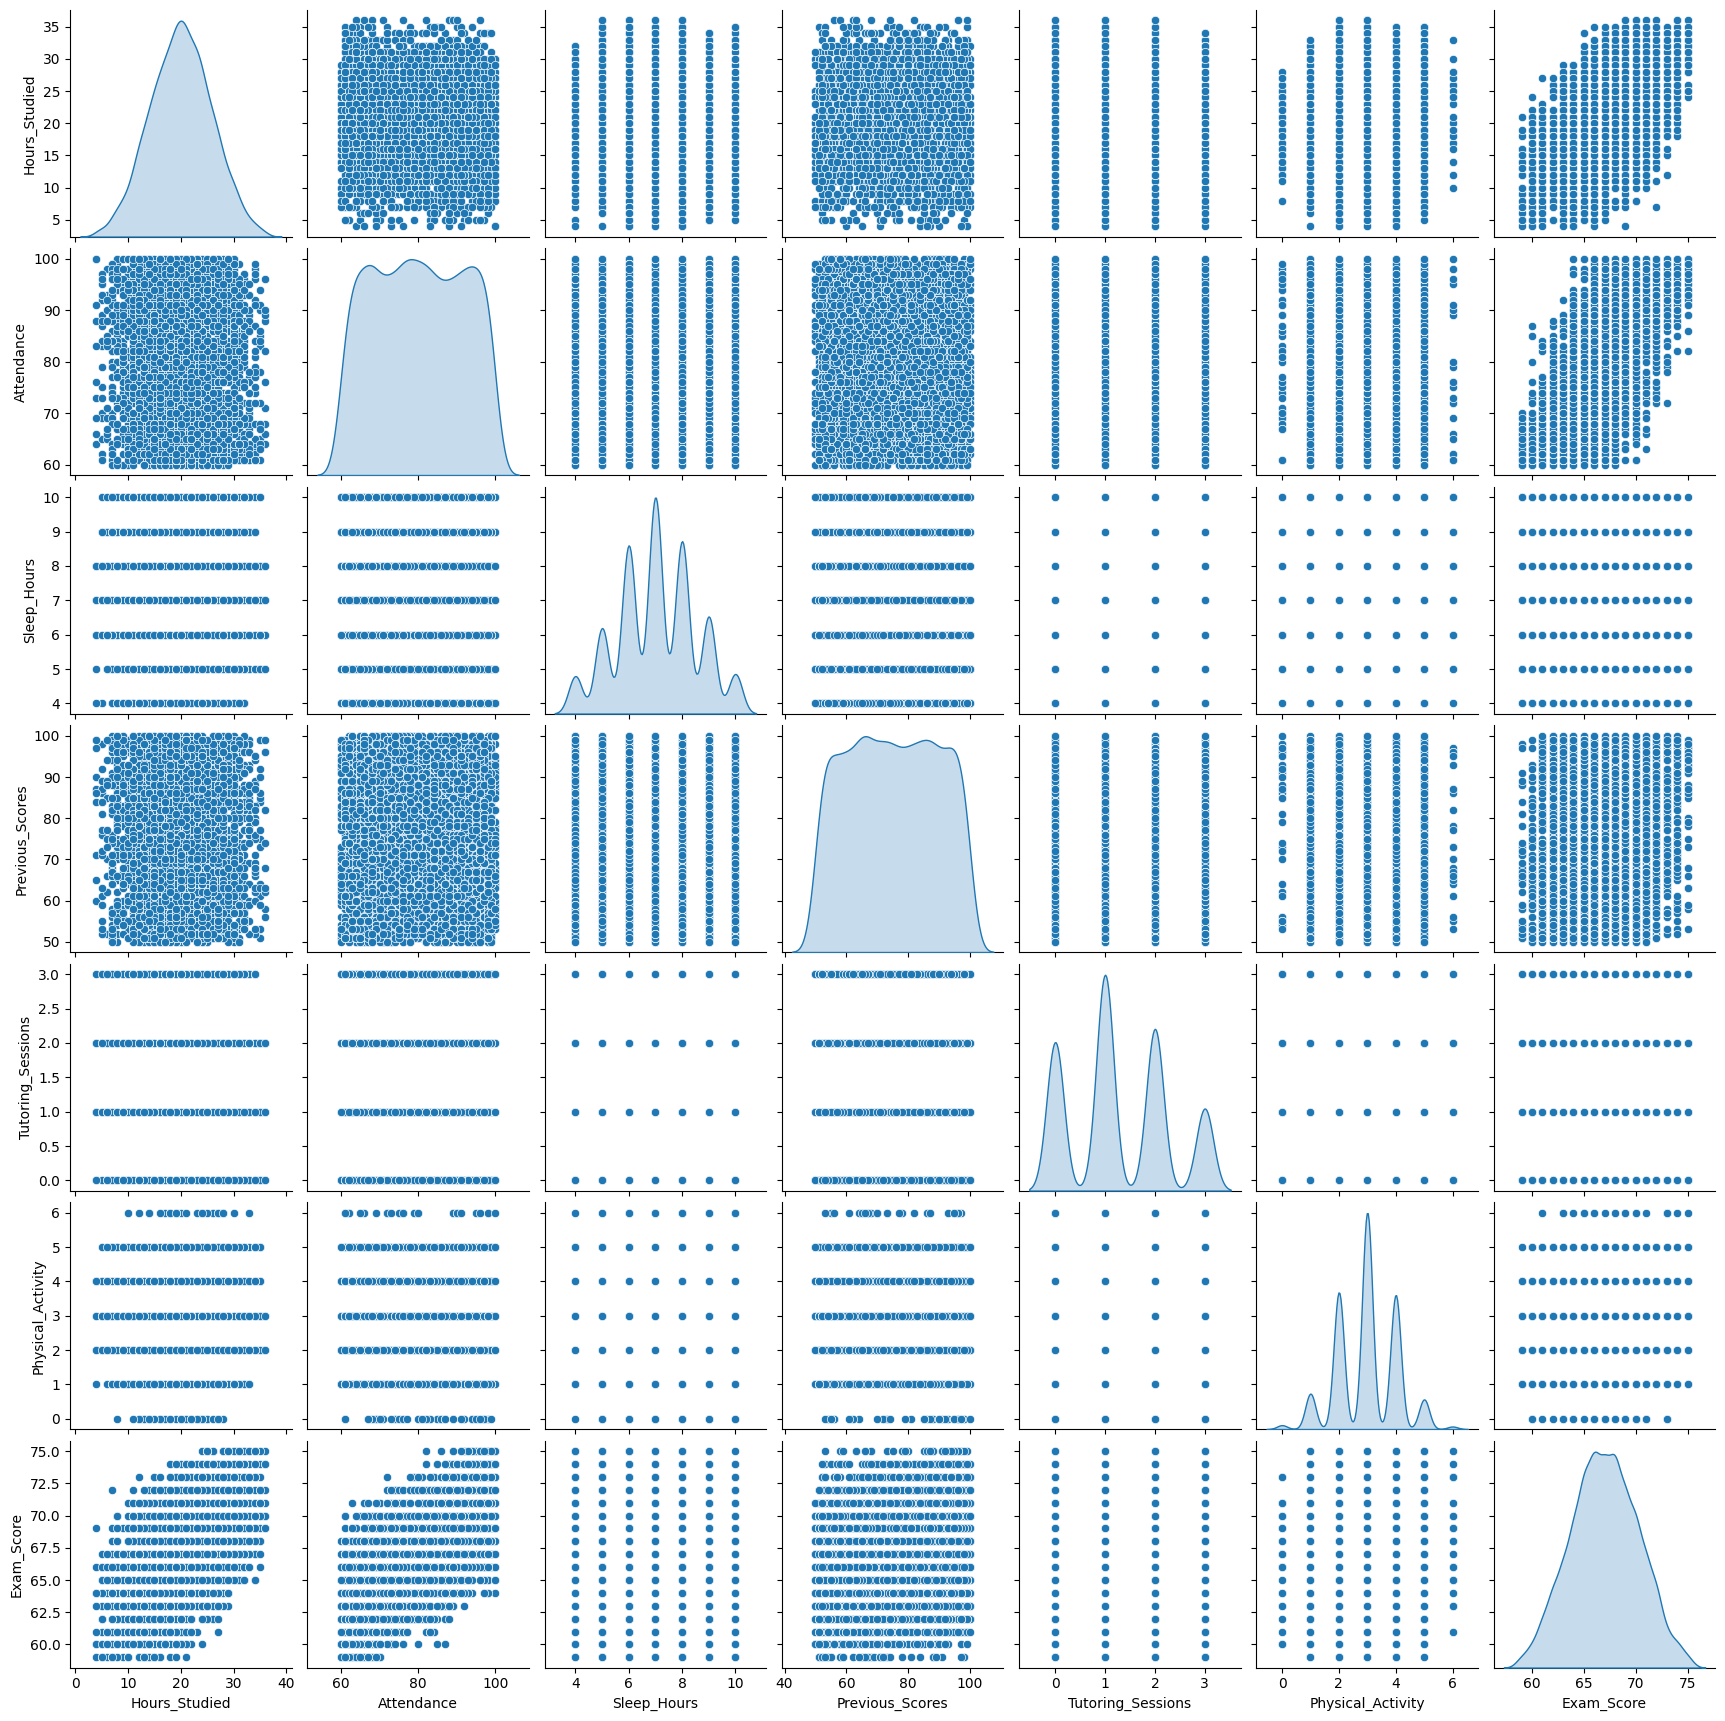

In [48]:
sns.pairplot(df, diag_kind = "kde")

Dari hasil pairplot, terlihat bahwa Hours_Studied dan Attendance adalah dua fitur numerik yang paling berkorelasi dengan Exam_Score. Oleh karena itu, kedua variabel ini dapat menjadi prediktor yang baik dalam model prediksi performa ujian.

Kode dibawah ini membuat *heatmap* untuk memvisualisasikan matriks korelasi fitur numerik dalam dataset. Nilai korelasi dihitung, dibulatkan, dan ditampilkan dengan anotasi menggunakan skema warna "coolwarm". Grafik ini mempermudah analisis hubungan antar fitur numerik.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

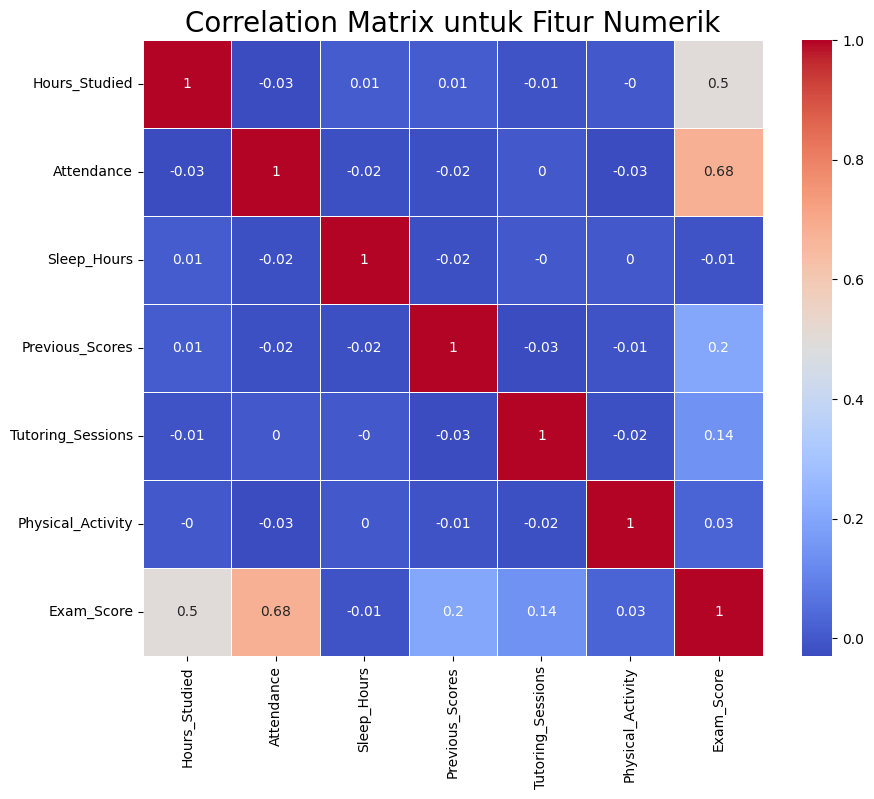

In [49]:
plt.figure(figsize = (10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size = 20)

Berdasarkan korelasi ini, Attendance (kehadiran) dan Hours_Studied (jam belajar) punya hubungan yang kuat dengan skor ujian, jadi ini adalah faktor penting yang memengaruhi hasil ujian. Sebaliknya, fitur seperti Sleep_Hours, Tutoring_Sessions, dan Physical_Activity hampir tidak ada hubungannya dengan skor, jadi mereka kurang relevan. Hubungan antar fitur juga lemah, jadi tidak ada fitur yang saling tumpang-tindih informasi di antaranya.

# 6. Data Preparation

Menghapus fitur yang memiliki korelasi rendah terhadap variabel target (Exam_Score) berdasarkan analisis korelasi sebelumnya.

In [50]:
df.drop(["Physical_Activity", "Sleep_Hours"], inplace = True, axis = 1)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,73,Low,Yes,0,Low,Medium,Public,Positive,No,High School,Near,Male,67
1,19,64,Low,Medium,No,59,Low,Yes,2,Medium,Medium,Public,Negative,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,91,Medium,Yes,2,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,98,Medium,Yes,1,Medium,Medium,Public,Negative,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,65,Medium,Yes,3,Medium,High,Public,Neutral,No,College,Near,Female,70


A. Encoding fitur kategori

untuk mengubah data kategorikal menjadi format numerik menggunakan one-hot encoding, sehingga dapat digunakan oleh algoritma pembelajaran mesin.

In [51]:
df = pd.concat([df, pd.get_dummies(df["Parental_Involvement"], prefix = "Parental_Involvement")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Access_to_Resources"], prefix = "Access_to_Resources")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Extracurricular_Activities"], prefix = "Extracurricular_Activities")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Motivation_Level"], prefix = "Motivation_Level")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Internet_Access"], prefix = "Internet_Access")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Family_Income"], prefix = "Family_Income")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Teacher_Quality"], prefix = "Teacher_Quality")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["School_Type"], prefix = "School_Type")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Peer_Influence"], prefix = "Peer_Influence")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Learning_Disabilities"], prefix = "Learning_Disabilities")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Parental_Education_Level"], prefix = "Parental_Education_Level")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Distance_from_Home"], prefix = "Distance_from_Home")],axis = 1)
df = pd.concat([df, pd.get_dummies(df["Gender"], prefix = "Gender")],axis = 1)
df.drop(["Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities", "Gender", "Motivation_Level", "Internet_Access", "Family_Income", "Teacher_Quality", "School_Type", "Peer_Influence", "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home", "Gender"], axis = 1, inplace = True)
df

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,73,0,67,False,True,False,True,False,...,True,False,False,True,False,False,False,True,False,True
1,19,64,59,2,61,False,True,False,False,False,...,True,False,True,False,False,False,True,False,True,False
2,24,98,91,2,74,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,True
3,29,89,98,1,71,False,True,False,False,False,...,True,False,False,True,False,False,True,False,False,True
4,19,92,65,3,70,False,False,True,False,False,...,True,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,76,1,68,True,False,False,False,False,...,True,False,False,True,False,False,False,True,True,False
6603,23,76,81,3,69,True,False,False,False,False,...,True,False,False,True,False,False,False,True,True,False
6604,20,90,65,3,68,False,False,True,False,True,...,True,False,False,False,True,False,False,True,True,False
6605,10,86,91,2,68,True,False,False,True,False,...,True,False,False,True,False,True,False,False,True,False


Setelah dilakukan encoding terhadap fitur-fitur kategorikal menggunakan metode one-hot encoding, data berhasil dikonversi ke format numerik sehingga dapat digunakan dalam algoritma pembelajaran mesin. Proses ini menghasilkan tambahan kolom baru yang merepresentasikan setiap kategori dalam fitur aslinya, sementara kolom kategorikal asli dihapus dari dataset.

Sebagai hasil akhir, dataset sekarang memiliki 39 kolom yang mencakup fitur numerik asli dan hasil encoding. Total baris data setelah proses data cleaning adalah 5.836, yang siap digunakan untuk analisis lebih lanjut atau pembuatan model prediktif.

B. Reduksi Dimensi dengan PCA

PCA dilakukan untuk menggabungkan dua fitur utama, yaitu Attendance dan Hours_Studied, menjadi satu dimensi baru (dimension). Langkah ini bertujuan untuk mengurangi kompleksitas data dengan tetap mempertahankan informasi penting.

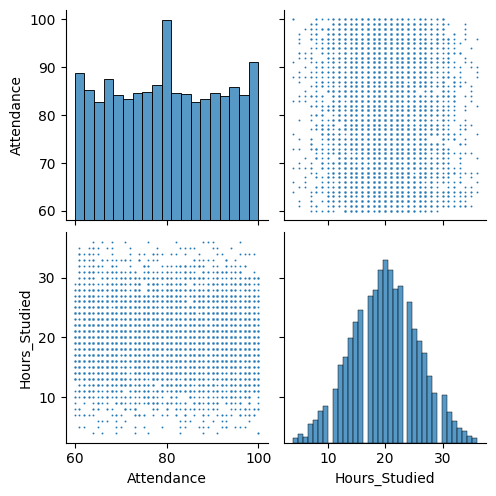

In [52]:
sns.pairplot(df[["Attendance", "Hours_Studied"]], plot_kws = {"s": 2});

Hasilnya, dua fitur ini menunjukkan tidak adanya hubungan linear yang jelas antara Attendance (kehadiran) dan Hours_Studied (jam belajar), dengan sebaran data yang merata. Histogram Attendance memiliki distribusi seragam di kisaran 60-100, sementara Hours_Studied mengikuti distribusi normal dengan puncak di sekitar 20 jam. Kedua fitur ini memiliki pola distribusi yang berbeda, sehingga penting untuk memverifikasi efektivitas PCA jika digunakan untuk mengurangi dimensi data.

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=123)
pca.fit(df[["Attendance", "Hours_Studied"]])
princ_comp = pca.transform(df[["Attendance", "Hours_Studied"]])

In [54]:
pca.explained_variance_ratio_.round(5)

array([0.79839, 0.20161])

Dengan PCA, dua fitur numerik (Attendance dan Hours_Studied) berhasil direduksi menjadi dua komponen utama tanpa kehilangan informasi penting. Komponen pertama menyimpan sebagian besar informasi (79.839%), sehingga sangat representatif, sedangkan komponen kedua melengkapi sisa variansi (20.161%). Teknik ini berguna untuk menyederhanakan analisis data sekaligus mempertahankan pola utama.

In [55]:
pca = PCA(n_components = 1, random_state = 123)
pca.fit(df[["Attendance", "Hours_Studied"]])
df["dimension"] = pca.transform(df.loc[:,  ("Attendance", "Hours_Studied")]).flatten()
df.drop(["Attendance", "Hours_Studied"], axis = 1, inplace = True)

Kode diatas ini menggunakan PCA untuk menggabungkan dua fitur numerik (Attendance dan Hours_Studied) menjadi satu dimensi utama, yaitu kolom dimension. Transformasi ini dilakukan untuk menyederhanakan data sambil mempertahankan informasi inti yang paling signifikan. Kolom asli dihapus untuk mencegah duplikasi data.

C. Train-Test-Split

In [56]:
from sklearn.model_selection import train_test_split
X = df.drop(["Exam_Score"],axis = 1)
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

Langkah ini memisahkan dataset menjadi dua bagian:

X: Berisi semua kolom kecuali kolom target Exam_Score. Fitur-fitur ini akan digunakan untuk memprediksi nilai target.
y: Berisi kolom target Exam_Score, yang merupakan variabel yang ingin diprediksi oleh model.

- Data latih (X_train dan y_train): Digunakan untuk melatih model.
- Data uji (X_test dan y_test): Digunakan untuk mengevaluasi performa model.

Parameter test_size=0.1 berarti 10% data akan digunakan sebagai data uji, sementara 90% sisanya akan menjadi data latih.
Parameter random_state=123 digunakan agar pembagian data tetap konsisten setiap kali kode dijalankan.

In [57]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5836
Total # of sample in train dataset: 5252
Total # of sample in test dataset: 584


Kesimpulannya:
membagi dataset menjadi fitur (X) dan target (y), kemudian memisahkan data tersebut menjadi data latih dan data uji dengan rasio 90:10. Proses ini penting untuk memastikan model dapat dilatih dengan data latih dan diuji dengan data uji untuk mengevaluasi performanya pada data baru.

D. Standarisasi

StandardScaler dapat dijelaskan dengan rumus berikut:

$$z = \frac{x-u}{s}$$


di mana:

$z$: Nilai data yang sudah distandarisasi
$x$: Nilai data asli sebelum distandarisasi
$u$: Rata-rata dari seluruh data
$s$: Simpangan baku (standar deviasi) dari data

In [58]:
from sklearn.preprocessing import StandardScaler

numerical_features = ["Tutoring_Sessions", "Previous_Scores", "dimension"]
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Tutoring_Sessions,Previous_Scores,dimension
1866,0.716688,-0.781958,0.338606
3361,-0.296241,-0.292524,1.231974
1686,-0.296241,1.315618,-1.035826
1003,-0.296241,-0.082766,0.788467
5186,-0.296241,-0.712039,-0.603437


Untuk menstandarkan fitur numerik seperti Tutoring_Sessions, Previous_Scores, dan dimension agar memiliki distribusi dengan rata-rata 0 dan standar deviasi 1

In [59]:
X_train[numerical_features].describe().round(4)

,Tutoring_Sessions,Previous_Scores,dimension
count,5252.0000,5252.0000,5252.0000
mean,-0.0000,-0.0000,0.0000
std,1.0001,1.0001,1.0001
min,-1.3092,-1.7608,-1.7493
25%,-0.2962,-0.8519,-0.8686
50%,-0.2962,-0.0128,-0.0054
75%,0.7167,0.8961,0.8705
max,1.7296,1.7351,1.7623


Hasilnya, fitur numerik telah dinormalisasi dengan statistik yang seragam, yaitu rata-rata 0 dan standar deviasi 1, yang meningkatkan konsistensi dan performa model.

In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

models = pd.DataFrame(index = ["train_mse", "test_mse"],
                      columns = ["KNN", "RandomForest", "Boosting"])

Kode diatas ini mengimpor model regresi dan MSE, lalu membuat DataFrame untuk menyimpan hasil MSE dari data latih dan uji untuk setiap model.

# 7. Model Development

A. Model Development dengan K-Nearest Neighbor

n_neighbors=10: Parameter n_neighbors menentukan jumlah tetangga terdekat yang akan digunakan untuk menghitung prediksi. Dalam hal ini, model akan mencari 10 data pelatihan terdekat dari data yang akan diprediksi.

In [61]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc["train_mse","knn"] = mean_squared_error(y_pred = knn.predict(X_train), y_true = y_train)

B. Model Development dengan Random Forest

n_estimators=50: Menentukan jumlah pohon keputusan yang akan dibangun. Dalam hal ini, model akan menggunakan 50 pohon.
max_depth=16: Menentukan kedalaman maksimum dari setiap pohon. Ini mengontrol seberapa dalam pohon dapat tumbuh, yang berpengaruh pada kompleksitas model.
random_state=55: Menetapkan nilai acak untuk memastikan hasil yang dapat direproduksi setiap kali model dijalankan.
n_jobs=-1: Menggunakan semua inti prosesor yang tersedia untuk memparalelkan perhitungan, sehingga proses pelatihan menjadi lebih cepat.

In [62]:
RF = RandomForestRegressor(n_estimators = 50, max_depth = 16, random_state = 55, n_jobs = -1)
RF.fit(X_train, y_train)
models.loc["train_mse", "RandomForest"] = mean_squared_error(y_pred = RF.predict(X_train), y_true = y_train)

C. Model Development dengan Boosting Algorithm

Learning_rate=0.05: Parameter ini mengontrol seberapa besar kontribusi setiap model baru terhadap prediksi keseluruhan. Dengan nilai 0.05, model baru akan memiliki kontribusi yang lebih kecil dalam perbaikan kesalahan model sebelumnya.
random_state=55: Sama seperti pada Random Forest, ini digunakan untuk memastikan hasil yang konsisten saat kode dijalankan berulang kali.

In [63]:
boosting = AdaBoostRegressor(learning_rate = 0.05, random_state = 55)
boosting.fit(X_train, y_train)
models.loc["train_mse", "Boosting"] = mean_squared_error(y_pred = boosting.predict(X_train), y_true = y_train)

# 8. Evaluasi Model


Untuk evaluasi model, kita dapat menggunakan Mean Squared Error (MSE), yang dirumuskan sebagai:
$$MSE = \frac{\Sigma (y_i - \hat{y_i})^2}{n}$$
dengan
* $y_i$: Nilai y sesungguhnya
* $\hat{y_i}$: Nilai y prediksi
* $n$: Jumlah data

Selain MSE, evaluasi juga dapat dilakukan menggunakan Root Mean Squared Error (RMSE). RMSE merupakan akar dari MSE, sehingga rumusnya adalah:
$$RMSE = \sqrt{MSE} = \sqrt{\frac{\Sigma (y_i - \hat{y_i})^2}{n}}$$

Selain kedua metrik tersebut, ada juga Mean Absolute Error (MAE). MAE dihitung dengan rumus:
$$MAE = \frac{\Sigma |y_i - \hat{y_i|}}{n}$$

Kode dibawah ini melakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1

In [64]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-64-0615151fc0c1>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.29624127  0.71668787  1.72961701 -0.29624127 -0.29624127  0.71668787
  1.72961701 -0.29624127  1.72961701  0.71668787  1.72961701  0.71668787
 -1.30917042 -1.30917042 -0.29624127 -0.29624127 -0.29624127 -1.30917042
 -1.30917042 -0.29624127  1.72961701 -0.29624127 -1.30917042  0.71668787
 -0.29624127 -1.30917042 -1.30917042 -1.30917042 -0.29624127  0.71668787
  0.71668787  0.71668787  1.72961701  1.72961701 -1.30917042 -0.29624127
 -1.30917042  1.72961701  0.71668787  0.71668787  0.71668787 -0.29624127
 -1.30917042  0.71668787 -1.30917042  0.71668787  0.71668787 -0.29624127
  0.71668787 -1.30917042 -0.29624127 -0.29624127 -0.29624127 -0.29624127
 -1.30917042 -1.30917042 -0.29624127 -1.30917042 -1.30917042 -0.29624127
 -0.29624127  0.71668787 -0.29624127  0.71668787  0.71668787 -1.30917042
  0.71668787 -0.29624127 -1.30917042 -1.3091

Kode dibawah ini menghitung Mean Squared Error (MSE) untuk model KNN, Random Forest (RF), dan Boosting pada data latih dan uji.

In [65]:
mse = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

model_dict = {"KNN": knn, "RF": RF, "Boosting": boosting}

for name, model in model_dict.items():
    mse.loc[name, "train"] = mean_squared_error(y_true = y_train, y_pred = model.predict(X_train))
    mse.loc[name, "test"] = mean_squared_error(y_true = y_test, y_pred = model.predict(X_test))

mse

,train,test
KNN,3.662169,4.270736
RF,0.515514,3.288766
Boosting,4.937516,5.136217


Hasilnya menunjukkan bahwa RF memiliki performa terbaik dengan MSE rendah (0.515514 pada data latih dan 3.288766 pada data uji), sementara Boosting memiliki MSE tertinggi dan kurang optimal. KNN cukup baik tetapi masih kalah dari RF.

Kode di bawah ini menghitung Mean Squared Error (MSE) untuk tiga model prediksi (KNN, Random Forest, dan Boosting) pada data latih (train) dan uji (test). Dua metode digunakan untuk menghitung MSE: fungsi bawaan mean_squared_error dan fungsi kustom MSE

In [66]:
def MSE(y_true, y_test):
    sum_error = 0.0
    y_true_values = y_true.values
    y_test_values = y_test

    if not isinstance(y_test_values, np.ndarray):
        y_test_values = np.array(y_test_values)

    for i in range(min(len(y_true_values), len(y_test_values))):
        prediction_error =  y_true_values[i] - y_test_values[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(min(len(y_true_values), len(y_test_values)))
    return mean_error

mse_2 = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

for name, model in model_dict.items():
    mse_2.loc[name, "train"] = MSE(y_train, model.predict(X_train))
    mse_2.loc[name, "test"] = MSE(y_test, model.predict(X_test))

mse_2

,train,test
KNN,3.662169,4.270736
RF,0.515514,3.288766
Boosting,4.937516,5.136217


Hasilnya sama, menunjukkan konsistensi penghitungan.

Hasil menunjukkan:

KNN: MSE moderat untuk latih (3.662) dan uji (4.271), menunjukkan keseimbangan performa.

Random Forest: MSE terendah pada data uji (3.289), menunjukkan performa terbaik, meski ada sedikit overfitting.

Boosting: MSE tertinggi pada latih (4.938) dan uji (5.136), menunjukkan performa paling lemah.

Kesimpulannya, Random Forest adalah model terbaik untuk data ini.

Kode di bawah ini menghitung Root Mean Squared Error (RMSE) untuk tiga model prediksi (KNN, Random Forest, dan Boosting) pada data latih (train) dan uji (test). Fungsi kustom RMSE dibuat dengan cara menghitung akar kuadrat dari rata-rata kesalahan kuadrat antara nilai sebenarnya (y_true) dan prediksi (y_test). Hasil RMSE disimpan dalam tabel untuk setiap model dan data.

In [67]:
def RMSE(y_true, y_test):
    sum_error = 0.0
    y_true_values = y_true.values
    y_test_values = y_test

    if not isinstance(y_test_values, np.ndarray):
        y_test_values = np.array(y_test_values)

    for i in range(min(len(y_true_values), len(y_test_values))):
        prediction_error =  y_true_values[i] - y_test_values[i]
        sum_error += (prediction_error ** 2)
    mean_error = np.sqrt(sum_error / float(min(len(y_true_values), len(y_test_values))))
    return mean_error

rmse = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

for name, model in model_dict.items():
    rmse.loc[name, "train"] = RMSE(y_train, model.predict(X_train))
    rmse.loc[name, "test"] = RMSE(y_test, model.predict(X_test))

rmse

,train,test
KNN,1.913679,2.066576
RF,0.717993,1.813496
Boosting,2.222052,2.266322


Hasil:

KNN: RMSE moderat pada latih (1.914) dan uji (2.067), menunjukkan performa stabil.

Random Forest: RMSE terendah pada uji (1.813), mengindikasikan performa terbaik dengan sedikit overfitting.

Boosting: RMSE tertinggi pada latih (2.222) dan uji (2.266), mengindikasikan performa kurang optimal.

Kesimpulan: Random Forest memiliki performa terbaik, diikuti oleh KNN. Boosting memberikan hasil terburuk pada data ini.

Kode dibawah ini menghitung Mean Absolute Error (MAE) untuk tiga model prediksi (KNN, Random Forest, dan Boosting) pada data latih (train) dan uji (test). Fungsi MAE mengakumulasi rata-rata dari selisih absolut antara nilai sebenarnya (y_true) dan nilai prediksi (y_test). Hasilnya disusun dalam tabel untuk setiap model.

In [68]:
def MAE(y_true, y_test):
    sum_error = 0.0
    y_true_values = y_true.values
    y_test_values = y_test

    if not isinstance(y_test_values, np.ndarray):
        y_test_values = np.array(y_test_values)

    for i in range(min(len(y_true_values), len(y_test_values))):
        prediction_error =  y_true_values[i] - y_test_values[i]
        sum_error += np.abs(prediction_error)
    mean_error = sum_error / float(min(len(y_true_values), len(y_test_values)))
    return mean_error

mae = pd.DataFrame(columns = ["train", "test"], index = ["KNN", "RF", "Boosting"])

for name, model in model_dict.items():
    mae.loc[name, "train"] = MAE(y_train, model.predict(X_train))
    mae.loc[name, "test"] = MAE(y_test, model.predict(X_test))

mae

,train,test
KNN,1.53749,1.670377
RF,0.567037,1.457753
Boosting,1.785506,1.806667


Hasil:

KNN: MAE pada latih (1.537) dan uji (1.670) relatif stabil.

Random Forest: MAE terendah pada uji (1.458), menunjukkan performa terbaik dan prediksi yang lebih akurat.

Boosting: MAE tertinggi pada latih (1.786) dan uji (1.807), mengindikasikan performa kurang optimal dibandingkan model lainnya.

Kesimpulan: Random Forest memberikan hasil terbaik dalam hal kesalahan absolut, diikuti oleh KNN, sedangkan Boosting menunjukkan performa terburuk pada data ini.

Kode dibawah ini membuat diagram batang horizontal untuk membandingkan MSE (Mean Squared Error) tiga model (KNN, RF, Boosting) pada data uji. Diagram diurutkan berdasarkan MSE tertinggi di atas, dengan grid di belakang grafik.

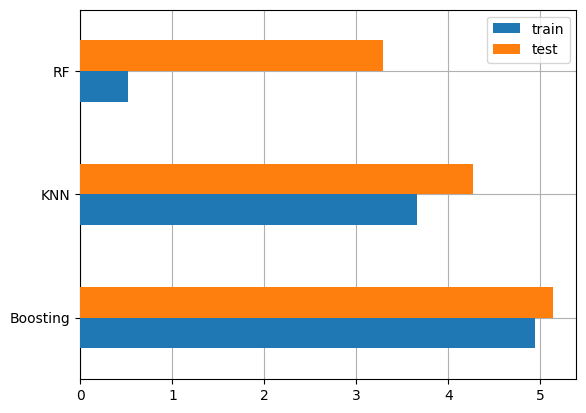

In [69]:
fig, ax = plt.subplots()
mse.sort_values(by = "test", ascending = False).plot(kind = "barh", ax = ax, zorder = 3)
ax.grid(zorder = 0)

Bisa dilihat algoritma Random Forest memiliki nilai error yang paling kecil.

In [70]:
prediksi = X_test.iloc[:5].copy()
pred_dict = {'y_true':y_test[:5]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
4653,70,68.6,68.7,69.1
3488,69,69.4,69.3,68.5
5432,74,71.7,72.1,70.5
2423,69,67.8,69.4,69.5
4756,71,73.0,72.1,70.5


Berdasarkan hasil prediksi untuk 5 sampel pertama pada data uji, dapat dilihat perbandingan antara nilai sebenarnya (y_true) dan prediksi dari masing-masing model:

*   KNN cenderung memiliki prediksi yang lebih sedikit lebih rendah dibandingkan nilai sebenarnya (y_true).
*   Random Forest menghasilkan prediksi yang lebih akurat dengan sedikit dari nilai sebenarnya, meskipun sedikit lebih rendah pada beberapa sampel.
*   Boosting memberikan prediksi yang sedikit lebih rendah atau lebih jauh dari nilai yang sebenarnya dibandingkan dengan RF, meskipun hasilnya masih cukup dekat.

Kesimpulannya:  

1.   Model yang paling akurat: Berdasarkan hasil prediksi, Random Forest (RF) adalah model yang paling akurat untuk memprediksi nilai ujian (Exam_Score) dibandingkan dengan KNN dan Boosting, karena prediksinya lebih dekat dengan nilai asli (y_true).

2.   Menjawab Business Understanding: Dalam konteks Business Understanding yang bertujuan untuk memprediksi nilai ujian siswa (Exam_Score), model RF lebih sesuai untuk tujuan ini karena memberikan prediksi yang lebih konsisten dan akurat. Random Forest adalah model yang terbaik dalam kasus ini, karena prediksi yang lebih dekat dengan nilai sebenarnya.